In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from scipy import stats
from datetime import datetime, timedelta
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df1 = pd.read_csv("bank-full.csv",sep=';')
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df1.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
df1.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

**The main data table was chosen as "bank-additional-full" because the number of features(columns) are more in this file. It was thought that a more truthfull and more succesfull result would be obtained in machine learning with data containing more columns or features.**

In [7]:
df2 = pd.read_csv("bank-additional-full.csv",sep=';')
df3 = pd.read_csv("bank-additional-full.csv",sep=';')
df2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df2.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [3]:
def Box_plots(df,clr):
  plt.figure(figsize=(10,4))
  plt.title("Box Plot")
  sns.boxplot(df, color= clr)
  plt.show()

def hist_plots(df,clr):
  plt.figure(figsize=(10,4))
  plt.hist(df, color =clr)
  plt.title("Histogram Plot")
  plt.show()

def dist_plots(df,clr):
  plt.figure(figsize=(10,4))
  plt.title("Distribution Plot")
  sns.distplot(df,color= clr)
  sns.despine()
  plt.show()

# **Getting rid of(deletion) from outliers with IQR method**

In [4]:
def IQR_outliers(df, column):

     Q1 = df[column].quantile(0.25)
     Q3 = df[column].quantile(0.75)
     IQR = Q3 - Q1
     df = df.loc[lambda df: ~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]
     return df

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


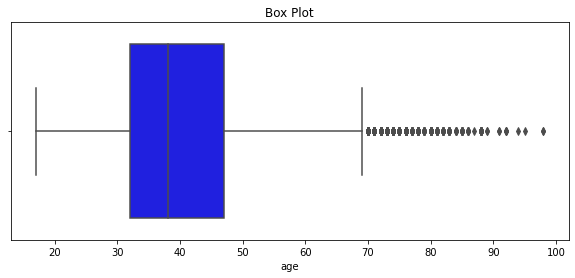

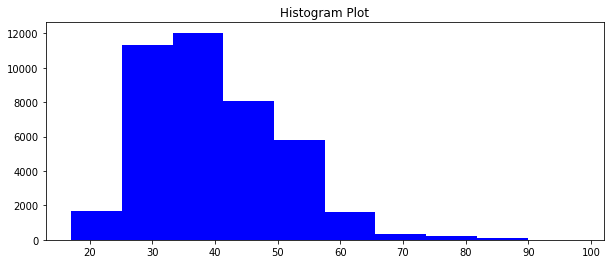

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


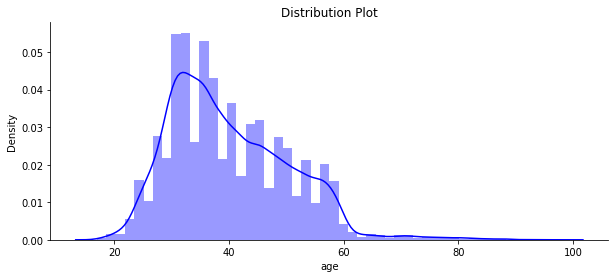

In [ ]:
Box_plots(df2["age"],"blue")
hist_plots(df2["age"],"blue")
dist_plots(df2["age"],"blue")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


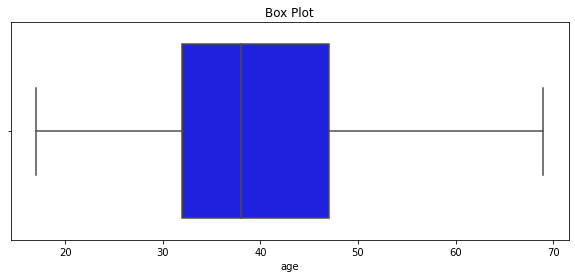

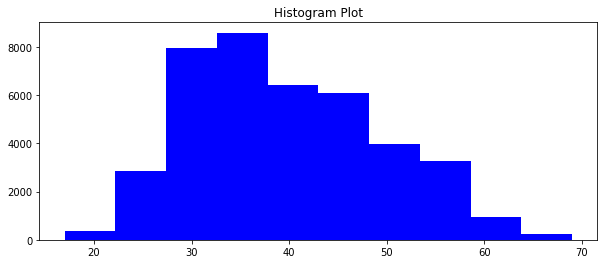

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


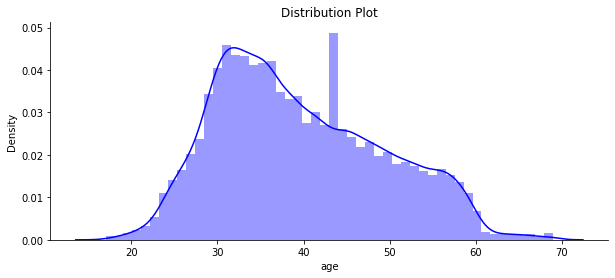

In [ ]:
df2 = df2.pipe(IQR_outliers, 'age')
Box_plots(df2["age"],"blue")
hist_plots(df2["age"],"blue")
dist_plots(df2["age"],"blue")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


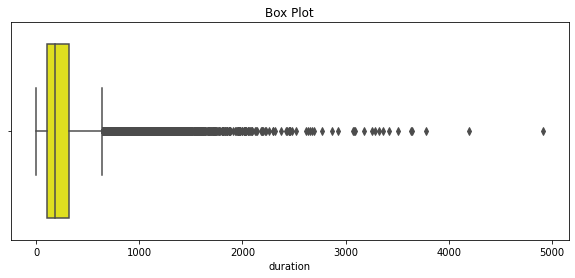

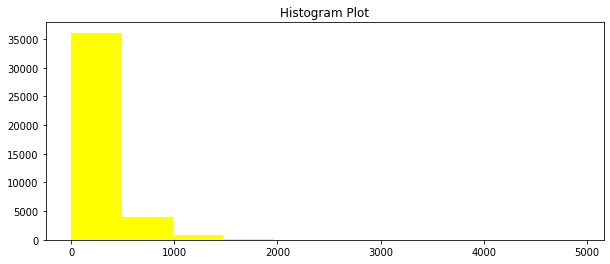

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


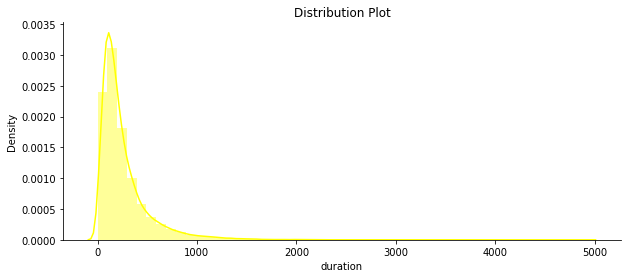

In [5]:
Box_plots(df2["duration"],"yellow")
hist_plots(df2["duration"],"yellow")
dist_plots(df2["duration"],"yellow")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


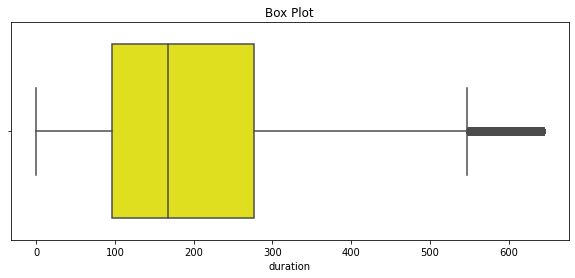

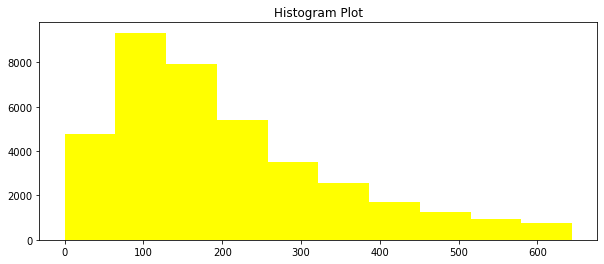

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


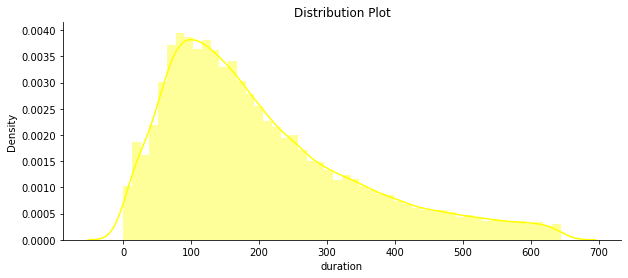

In [6]:
df2 = df2.pipe(IQR_outliers, 'duration')
Box_plots(df2["duration"],"yellow")
hist_plots(df2["duration"],"yellow")
dist_plots(df2["duration"],"yellow")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


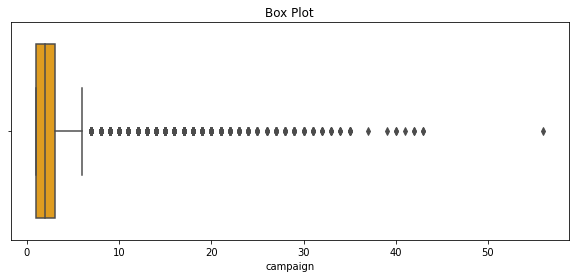

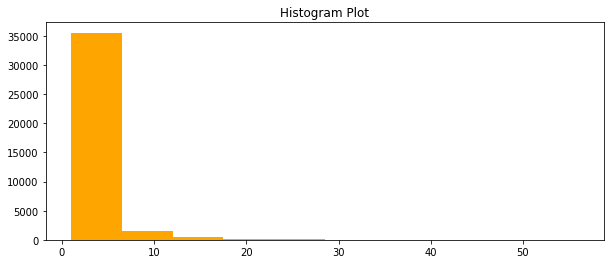

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


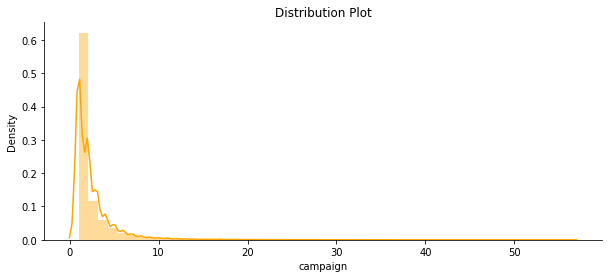

In [ ]:
Box_plots(df2["campaign"],"orange")
hist_plots(df2["campaign"],"orange")
dist_plots(df2["campaign"],"orange")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


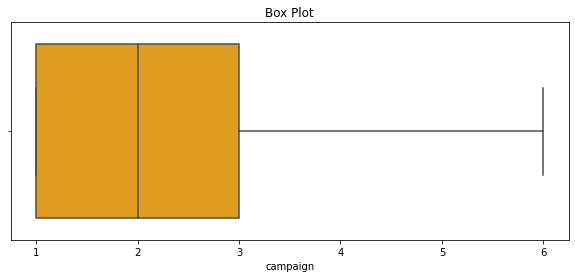

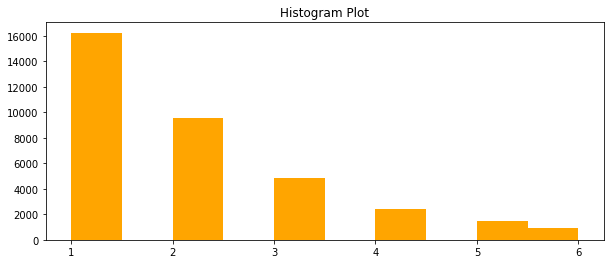

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


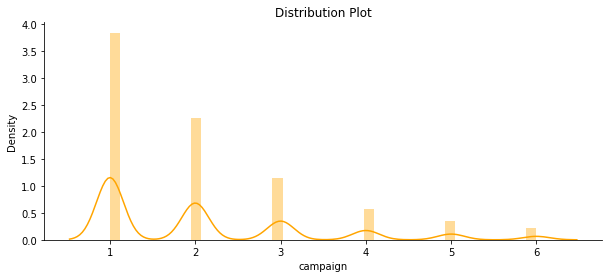

In [ ]:
df2 = df2.pipe(IQR_outliers, 'campaign')
Box_plots(df2["campaign"],"orange")
hist_plots(df2["campaign"],"orange")
dist_plots(df2["campaign"],"orange")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


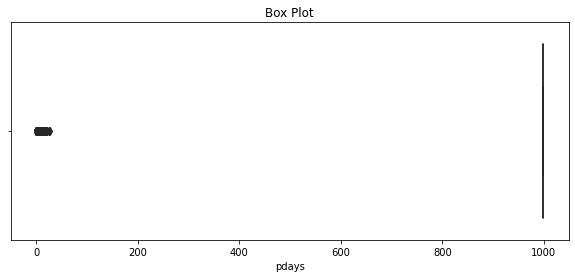

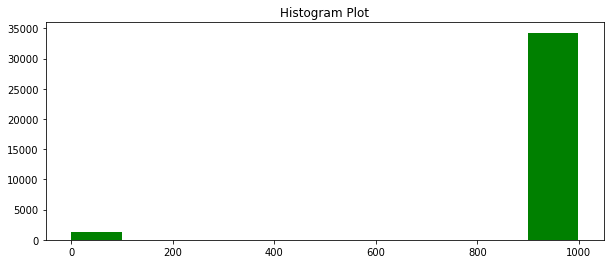

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


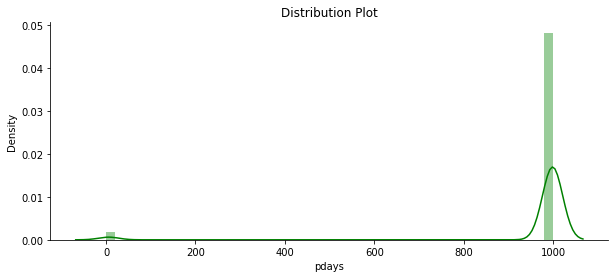

In [ ]:
Box_plots(df2["pdays"],"green")
hist_plots(df2["pdays"],"green")
dist_plots(df2["pdays"],"green")

In [ ]:
df2["pdays"].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  27,  20,
        19])

**According to data information ;
pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)**

**It is decided to not process "pdays" column for outlier deletion, that even pdays seem to have lots of outliers, the values have meaning.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


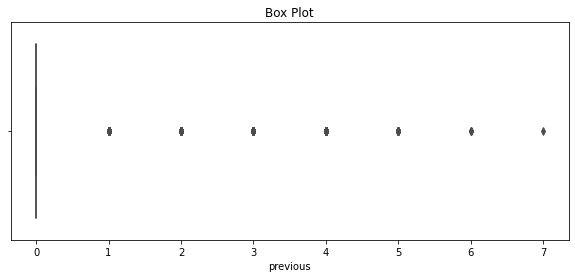

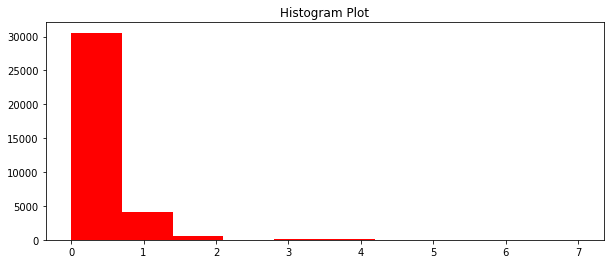

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


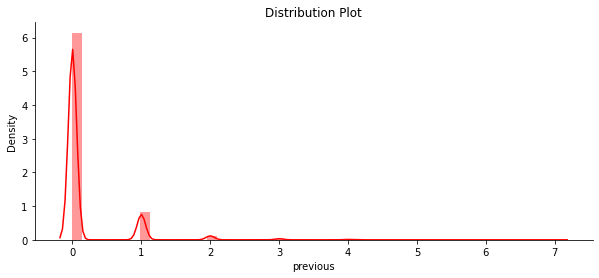

In [ ]:
Box_plots(df2["previous"],"red")
hist_plots(df2["previous"],"red")
dist_plots(df2["previous"],"red")

**Similar to "pdays", It is decided to not process "previous" column for outlier deletion, that even previous seem to have lots of outliers, the values can have meaningfull correlation with output "y".**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


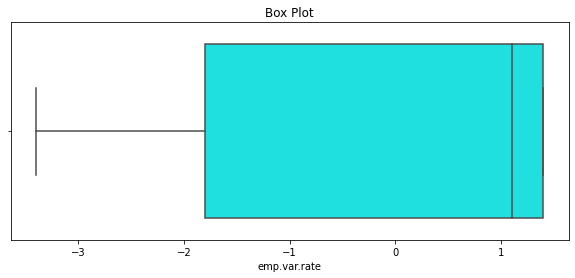

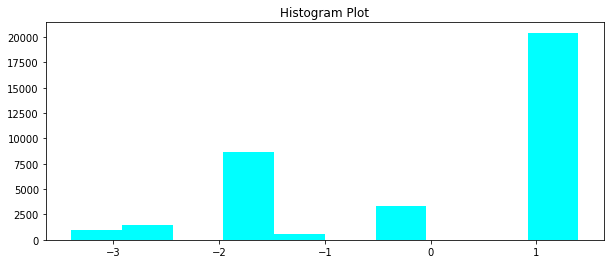

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


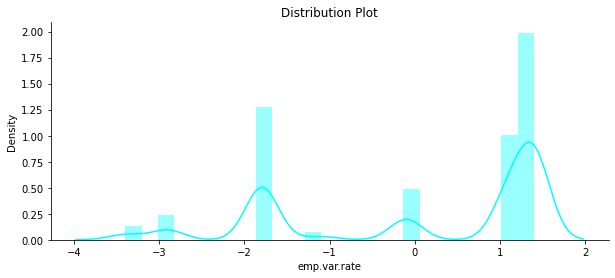

In [ ]:
Box_plots(df2["emp.var.rate"],"aqua")
hist_plots(df2["emp.var.rate"],"aqua")
dist_plots(df2["emp.var.rate"],"aqua")

**There is no need for outliers to be processed.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


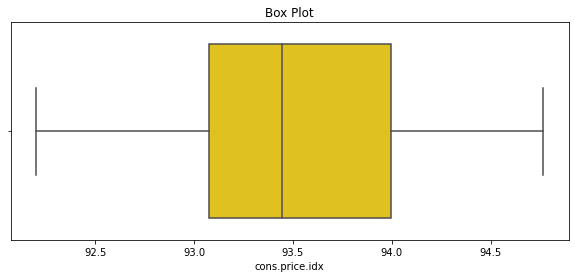

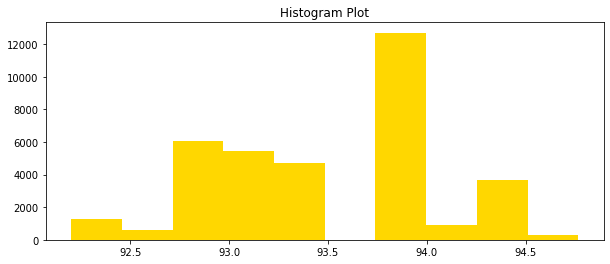

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


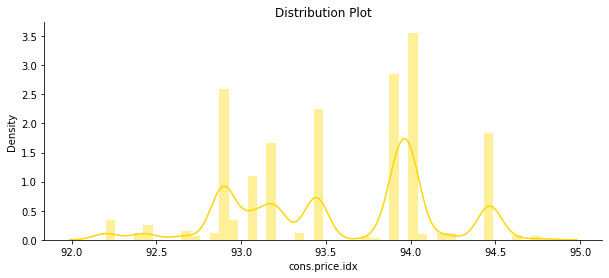

In [ ]:
Box_plots(df2["cons.price.idx"],"gold")
hist_plots(df2["cons.price.idx"],"gold")
dist_plots(df2["cons.price.idx"],"gold")

**There is no need for outliers to be processed.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


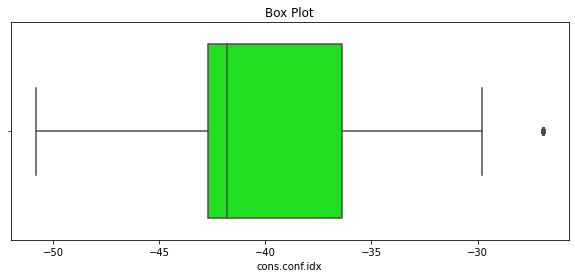

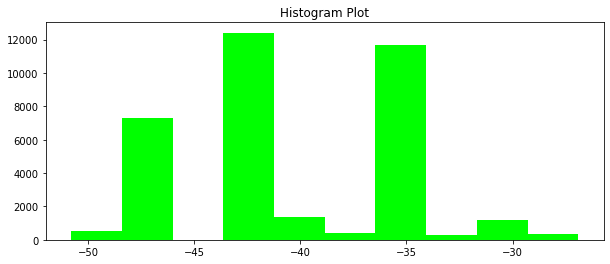

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


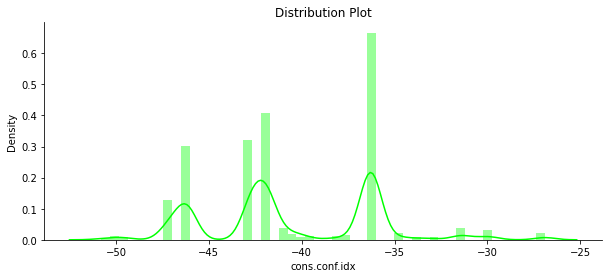

In [ ]:
Box_plots(df2["cons.conf.idx"],"lime")
hist_plots(df2["cons.conf.idx"],"lime")
dist_plots(df2["cons.conf.idx"],"lime")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


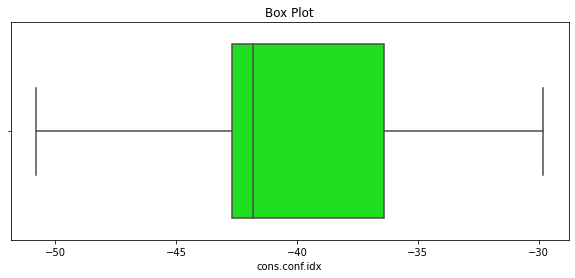

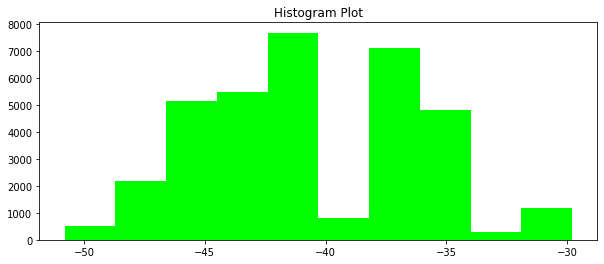

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


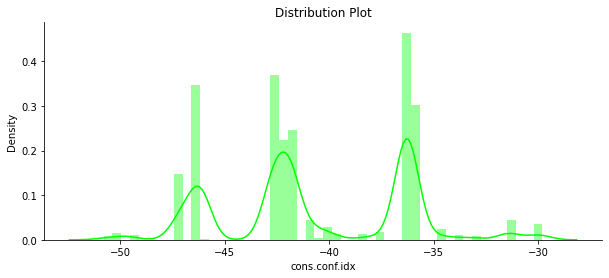

In [ ]:
df2 = df2.pipe(IQR_outliers, 'cons.conf.idx')
Box_plots(df2["cons.conf.idx"],"lime")
hist_plots(df2["cons.conf.idx"],"lime")
dist_plots(df2["cons.conf.idx"],"lime")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


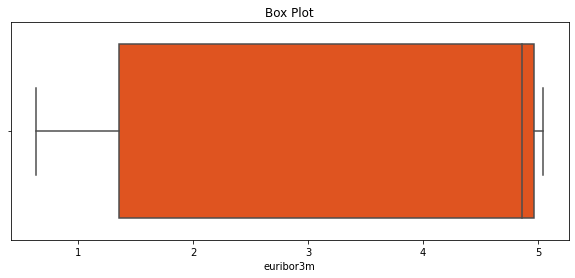

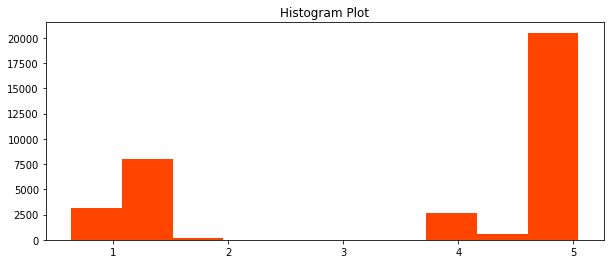

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


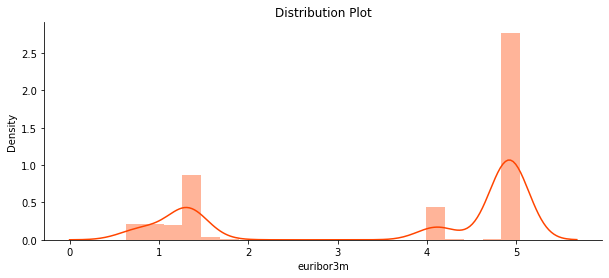

In [ ]:
Box_plots(df2["euribor3m"],"orangered")
hist_plots(df2["euribor3m"],"orangered")
dist_plots(df2["euribor3m"],"orangered")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


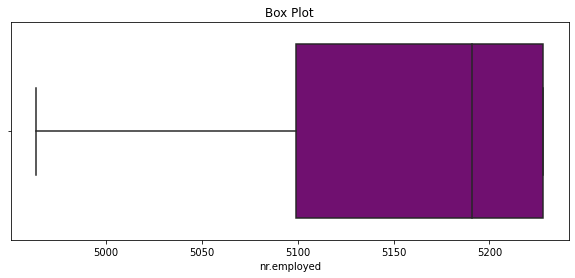

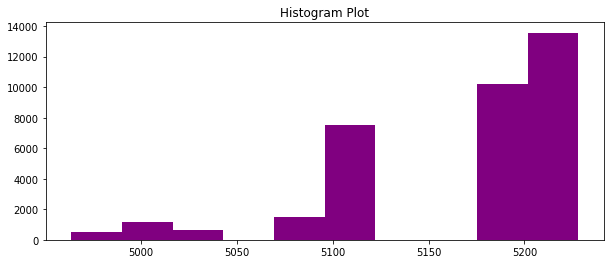

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


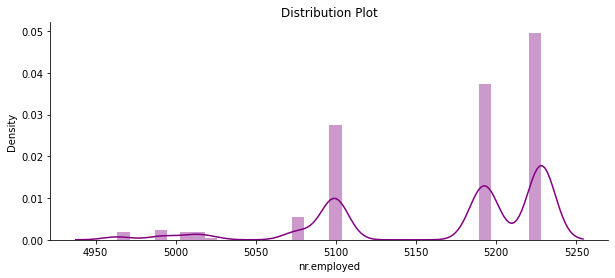

In [ ]:
Box_plots(df2["nr.employed"],"purple")
hist_plots(df2["nr.employed"],"purple")
dist_plots(df2["nr.employed"],"purple")

**There is no need for outliers to be processed.**

## Process of Na, "unkown" values after outlier deletion

In [ ]:
df2.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
str_cols = [x for x in df2.columns if type(df2[x].loc[df2[x].first_valid_index()])==str]

for columns in str_cols:
  print(columns)
  print(len(df2[df2[columns].str.contains('unknown')]))


job
273
marital
60
education
1442
default
7366
housing
849
loan
849
contact
0
month
0
day_of_week
0
poutcome
0
y
0


**When object typed columns are checked, the “unknown” string is searched, the number of NA, “unknown” rows from 41188 rows in total in each column are stated with their column names above.**

In [ ]:
df2['job'].value_counts()

admin.           8998
blue-collar      8049
technician       5823
services         3438
management       2508
entrepreneur     1261
self-employed    1212
retired          1100
housemaid         890
unemployed        868
student           756
unknown           273
Name: job, dtype: int64

In [ ]:
df2['job'] = df2['job'].replace(['unknown'],np.nan)

**When the “job” column is handled, “unknown” is found in 273 rows, as it is pointed with a red rectangle on the left. So, it is planned to be removed from the data because it is seen as an insignificant amount.**

In [ ]:
df2['marital'].value_counts()

married     21283
single       9951
divorced     3882
unknown        60
Name: marital, dtype: int64

In [ ]:
df2['marital'] = df2['marital'].replace(['unknown'],np.nan)

**When the “marital” column is handled, “unknown” is found in 60 rows, as it is pointed with a red rectangle on the left. So, it is planned to be removed from the data because it is seen as an insignificant amount.**

In [ ]:
df2['education'].value_counts()

university.degree      10417
high.school             8198
basic.9y                5267
professional.course     4499
basic.4y                3380
basic.6y                1959
unknown                 1442
illiterate                14
Name: education, dtype: int64

**When the “education” column is handled, “unknown” is found in 1442 rows, as it is pointed with a red rectangle on the left. So, it is planned to be handled as a different class since it has a significant number of members.**

In [ ]:
df2['default'].value_counts()

no         27807
unknown     7366
yes            3
Name: default, dtype: int64

In [ ]:
df2['default'] = df2['default'].replace(['yes'],np.nan)


**When the “default” column is handled, “unknown” is found in 7366 rows, as it is pointed with a red rectangle on the left. So, it is planned to be handled as a another category while it is decided that "yes" should be deleted from that since it has just 2 rows.**

In [ ]:
df2['housing'].value_counts()

yes        18472
no         15855
unknown      849
Name: housing, dtype: int64

In [ ]:
df2['housing'] = df2['housing'].replace(['unknown'],np.nan)

**When the “housing” column is handled, “unknown” is found in 849 rows, as it is pointed with a red rectangle on the left. So, it is planned to be removed from the data because it is seen as an insignificant amount.**


In [ ]:
df2['loan'].value_counts()

no         28986
yes         5341
unknown      849
Name: loan, dtype: int64

In [ ]:
df2['loan'] = df2['loan'].replace(['unknown'],"no")


 **When the “loan” column is handled, “unknown” is found in 849 rows, as it is pointed with a red rectangle on the left. So, it is planned to be removed from the data because it is seen as an insignificant amount.**

In [ ]:
df2=df2.dropna()

In [ ]:
df2.shape

(34003, 21)

**At the beginning, data had 41188 rows. With outlier deletion process and process of "unknown" values 34003 rows remained.**

# **Data visualisation of categorical values after deletion of numerical outliers**

## Triangle Correlation Heatmap

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


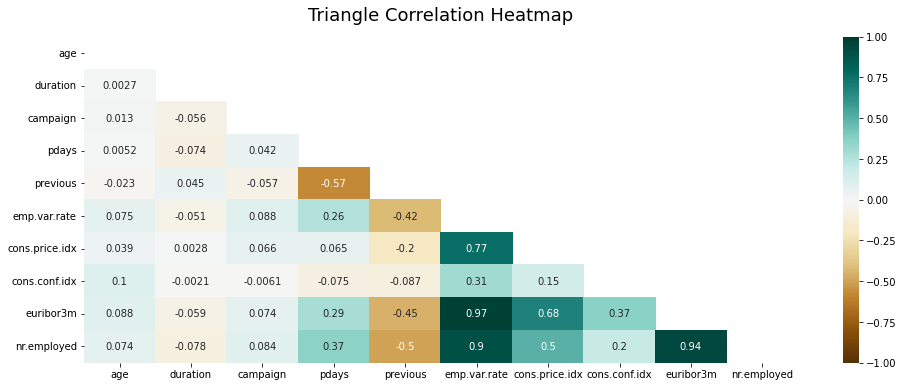

In [ ]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df2.corr(), dtype=np.bool))
heatmap = sns.heatmap(df2.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

**In correlation heat map, “euribo3rn”, “cons.priceidx”, “nr.employed” and “emp.var.rate” features have very high correlation between them. 2 or 3 of these features can be dropped from the data, since their existence will not be extra useful-providing good, new information- for machine learning model which will be deployed in next steps.**

## Default Column Analysis

In [ ]:
df_def=df2.groupby("default")["age"].count()
df_def=pd.DataFrame(df_def)
df_def = df_def.rename_axis('default').reset_index()
df_def.rename(columns = {'age':'user'}, inplace = True)
df_def.head()

,default,user
0,no,26969
1,unknown,7034


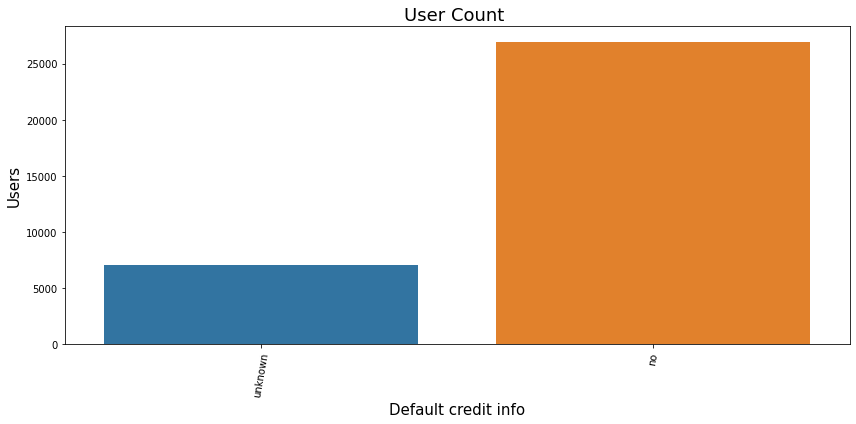

In [ ]:
plt.figure(figsize=(12,6))
# make barplot and sort bars
sns.barplot(x='default',
            y="user", 
            data=df_def, 
            order=df_def.sort_values('user').default)
# set labels
plt.xlabel("Default credit info", size=15)
plt.xticks(rotation=80)
plt.ylabel("Users", size=15)
plt.title("User Count ", size=18)
plt.tight_layout()

**Most of the customers do not have credit in default or this information is unkown.**

## Housing Column Analysis

In [ ]:
df_hous=df2.groupby("housing")["age"].count()
df_hous=pd.DataFrame(df_hous)
df_hous = df_hous.rename_axis('housing').reset_index()
df_hous.rename(columns = {'age':'user'}, inplace = True)
df_hous.head()

,housing,user
0,no,15694
1,yes,18309


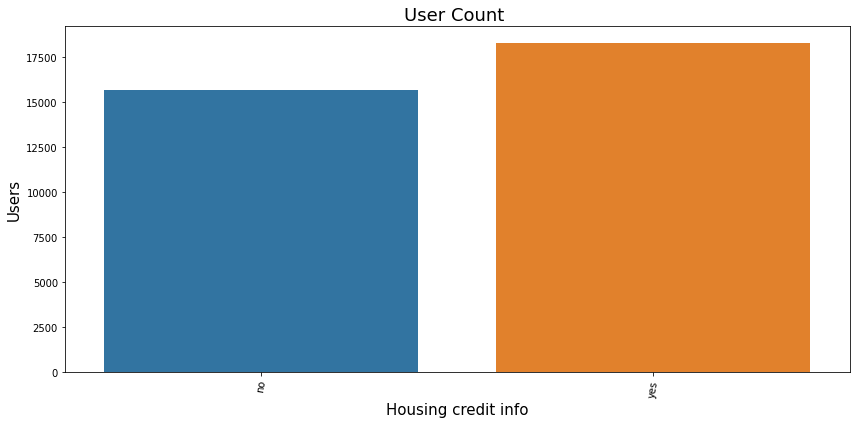

In [ ]:
plt.figure(figsize=(12,6))
# make barplot and sort bars
sns.barplot(x='housing',
            y="user", 
            data=df_hous, 
            order=df_hous.sort_values('user').housing)
# set labels
plt.xlabel("Housing credit info", size=15)
plt.xticks(rotation=80)
plt.ylabel("Users", size=15)
plt.title("User Count ", size=18)
plt.tight_layout()

**It can be stated that, almost half of the customers have housing credit while other half do not.**

## Loan Column Analysis

In [ ]:
df_loan=df2.groupby("loan")["age"].count()
df_loan=pd.DataFrame(df_loan)
df_loan = df_loan.rename_axis('loan').reset_index()
df_loan.rename(columns = {'age':'user'}, inplace = True)
df_loan.head()

,loan,user
0,no,28716
1,yes,5287


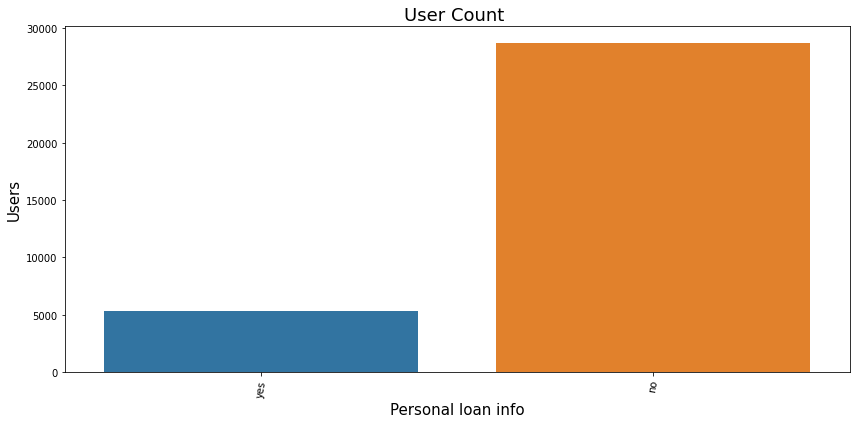

In [ ]:
plt.figure(figsize=(12,6))
# make barplot and sort bars
sns.barplot(x='loan',
            y="user", 
            data=df_loan, 
            order=df_loan.sort_values('user').loan)
# set labels
plt.xlabel("Personal loan info", size=15)
plt.xticks(rotation=80)
plt.ylabel("Users", size=15)
plt.title("User Count ", size=18)
plt.tight_layout()

**It can be mentioned that very significant proportion of customers do not have any personal loan.**

## Contact Column Analysis

In [ ]:
df_con=df2.groupby("contact")["age"].count()
df_con=pd.DataFrame(df_con)
df_con = df_con.rename_axis('contact').reset_index()
df_con.rename(columns = {'age':'user'}, inplace = True)
df_con.head()

,contact,user
0,cellular,21649
1,telephone,12354


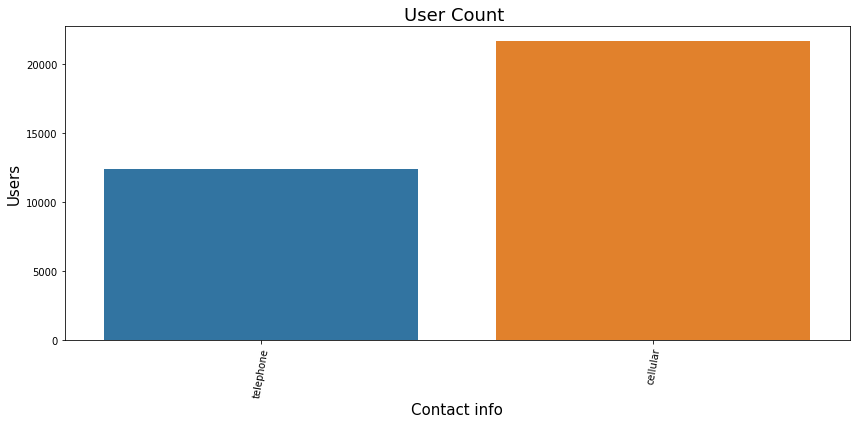

In [ ]:
plt.figure(figsize=(12,6))
# make barplot and sort bars
sns.barplot(x='contact',
            y="user", 
            data=df_con, 
            order=df_con.sort_values('user').contact)
# set labels
plt.xlabel("Contact info", size=15)
plt.xticks(rotation=80)
plt.ylabel("Users", size=15)
plt.title("User Count ", size=18)
plt.tight_layout()

## Poutcome Column Analysis

In [ ]:
df_poutcome=df2.groupby("poutcome")["age"].count()
df_poutcome=pd.DataFrame(df_poutcome)
df_poutcome = df_poutcome.rename_axis('poutcome').reset_index()
df_poutcome.rename(columns = {'age':'user'}, inplace = True)
df_poutcome.head()

,poutcome,user
0,failure,3604
1,nonexistent,29342
2,success,1057


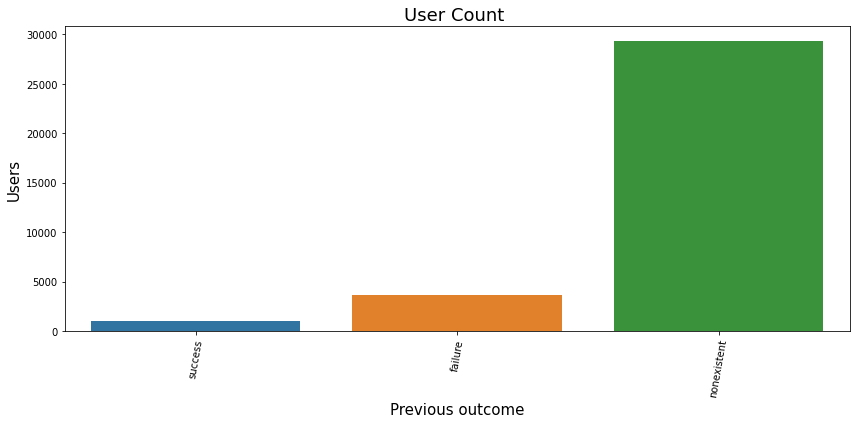

In [ ]:
plt.figure(figsize=(12,6))
# make barplot and sort bars
sns.barplot(x='poutcome',
            y="user", 
            data=df_poutcome, 
            order=df_poutcome.sort_values('user').poutcome)
# set labels
plt.xlabel("Previous outcome", size=15)
plt.xticks(rotation=80)
plt.ylabel("Users", size=15)
plt.title("User Count ", size=18)
plt.tight_layout()

**It can be said that most of the customers' previous outcome of this campaign for the bank is nonexistent.**

## Y Column- Subscription to term deposit Analysis

In [ ]:
df_y=df2.groupby("y")["age"].count()
df_y=pd.DataFrame(df_y)
df_y = df_y.rename_axis('y').reset_index()
df_y.rename(columns = {'age':'user'}, inplace = True)
df_y.head()

,y,user
0,no,31355
1,yes,2648


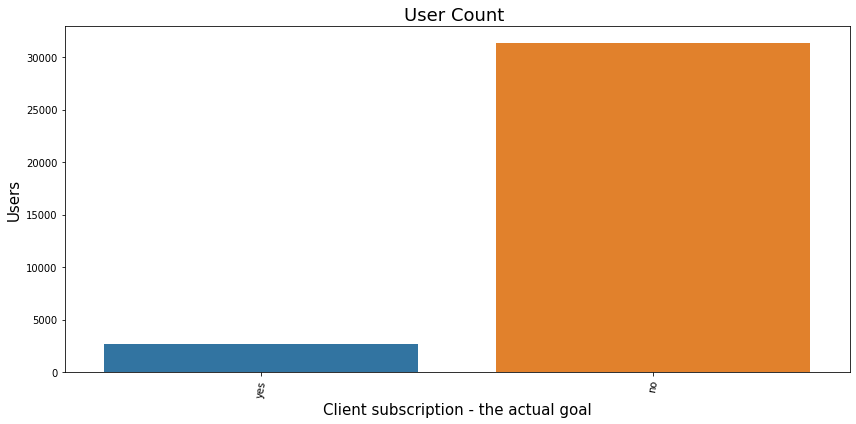

In [ ]:
plt.figure(figsize=(12,6))
# make barplot and sort bars
sns.barplot(x='y',
            y="user", 
            data=df_y, 
            order=df_y.sort_values('user').y)
# set labels
plt.xlabel("Client subscription - the actual goal", size=15)
plt.xticks(rotation=80)
plt.ylabel("Users", size=15)
plt.title("User Count ", size=18)
plt.tight_layout()

**Meaningfull relations with this column are analyzed in the next steps.This column is the one that wanted to be predicted with the knowledge of other features, columns information.**

## Duration Column Analysis

In [9]:
bins= [0,200,400,600,800,1000,1200,5000]
labels = ['0-200','200-400','400-600','600-800','800-1000','1000-1200','1200-5000']
df2['DurGroup'] = pd.cut(df2['duration'], bins=bins, labels=labels, right=False)


In [11]:
df_duration=df2.groupby(['y','DurGroup'])["job"].agg(['count'])
df_duration

count
y   DurGroup        
no  0-200      21946
    200-400     9952
    400-600     2862
    600-800     1030
    800-1000     367
    1000-1200    197
    1200-5000    194
yes 0-200        706
    200-400     1385
    400-600      859
    600-800      681
    800-1000     439
    1000-1200    249
    1200-5000    321

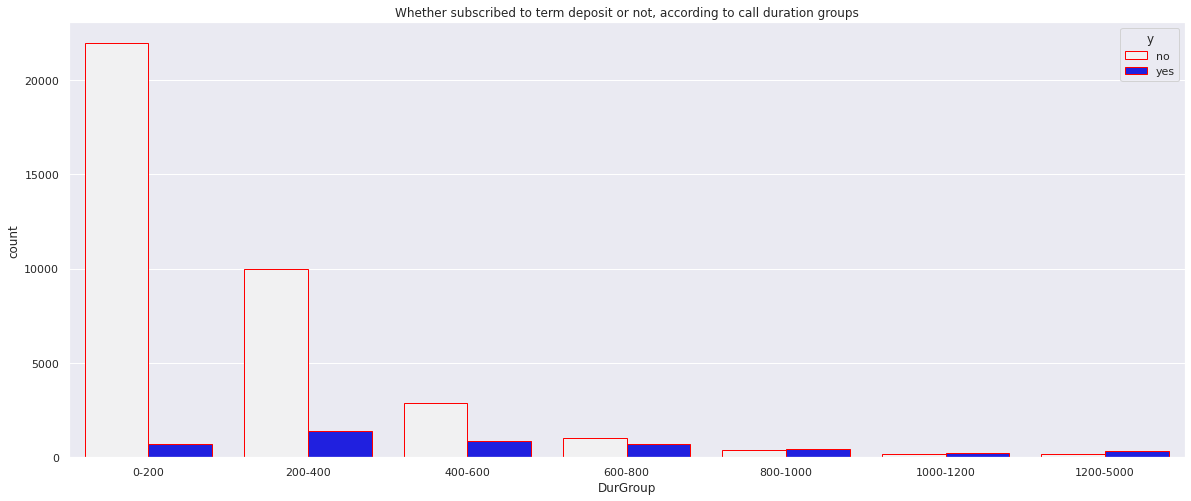

In [15]:

df_durr=df_duration.reset_index()

plt.title("Whether subscribed to term deposit or not, according to call duration groups")
sns.set(rc = {'figure.figsize':(20,10)})
sns.barplot(data=df_durr,hue="y",x="DurGroup",y="count",color="blue", edgecolor='red')

In [12]:
df2.groupby("DurGroup")["y"].value_counts(normalize=True).mul(100)
#ratios in terms of percent

DurGroup   y  
0-200      no     96.883277
           yes     3.116723
200-400    no     87.783364
           yes    12.216636
400-600    no     76.914808
           yes    23.085192
600-800    no     60.198714
           yes    39.801286
800-1000   yes    54.466501
           no     45.533499
1000-1200  yes    55.829596
           no     44.170404
1200-5000  yes    62.330097
           no     37.669903
Name: y, dtype: float64

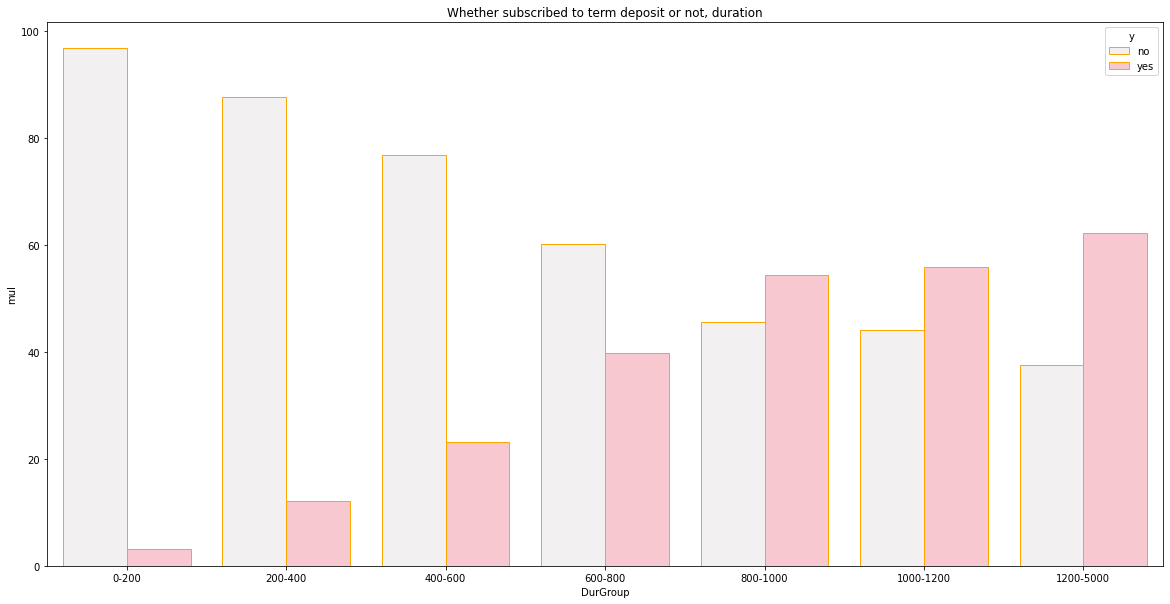

In [13]:
dur_mul=df2.groupby("DurGroup")["y"].value_counts(normalize=True).mul(100)
dur_muldf=pd.DataFrame(dur_mul)
dur_muldf.rename(columns = {'y':'mul'}, inplace = True)
dur_muldf=dur_muldf.reset_index()
dur_muldf
plt.figure(figsize=(20,10))
plt.title("Whether subscribed to term deposit or not, duration")
sns.barplot(data=dur_muldf,hue="y",x="DurGroup",y="mul",color="pink",edgecolor='orange')

## Age Column Analysis

In [ ]:
bins= [18,26,41,61,100]
labels = ['18-25','26-40','41-60','60+']
df2['AgeGroup'] = pd.cut(df2['age'], bins=bins, labels=labels, right=False)

In [ ]:
df_age_year=df2.groupby(['y','AgeGroup'])["job"].agg(['count'])
df_age_year

count
y   AgeGroup       
no  18-25      1121
    26-40     17158
    41-60     12874
    60+         199
yes 18-25       241
    26-40      1424
    41-60       836
    60+         147

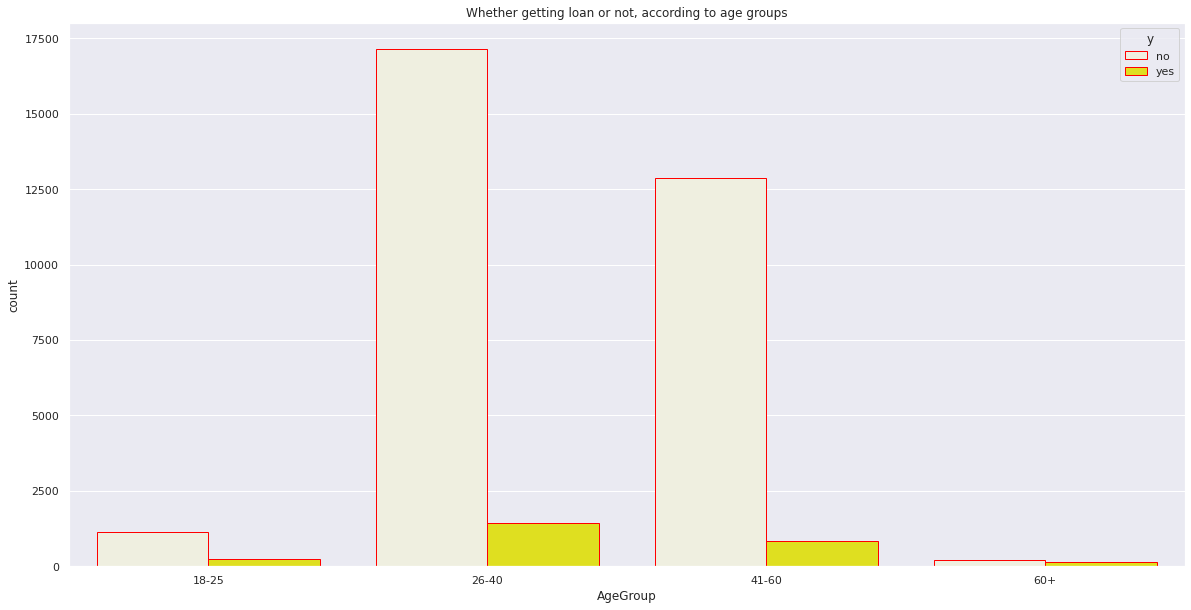

In [ ]:
df_age=df2.groupby(["y","AgeGroup"])["job"].agg(["count"])
df_agee=df_age.reset_index()

plt.title("Whether getting loan or not, according to age groups")
sns.set(rc = {'figure.figsize':(20,8)})
sns.barplot(data=df_agee,hue="y",x="AgeGroup",y="count",color="yellow", edgecolor='red')

**There are lots of customers in 26-40 age group, both subscribed to terms deposit and did not, when we compare with other age groups.**

In [ ]:
df2.groupby("AgeGroup")["y"].value_counts(normalize=True).mul(100)
#ratios in terms of percent

AgeGroup  y  
18-25     no     82.305433
          yes    17.694567
26-40     no     92.336670
          yes     7.663330
41-60     no     93.902261
          yes     6.097739
60+       no     57.514451
          yes    42.485549
Name: y, dtype: float64

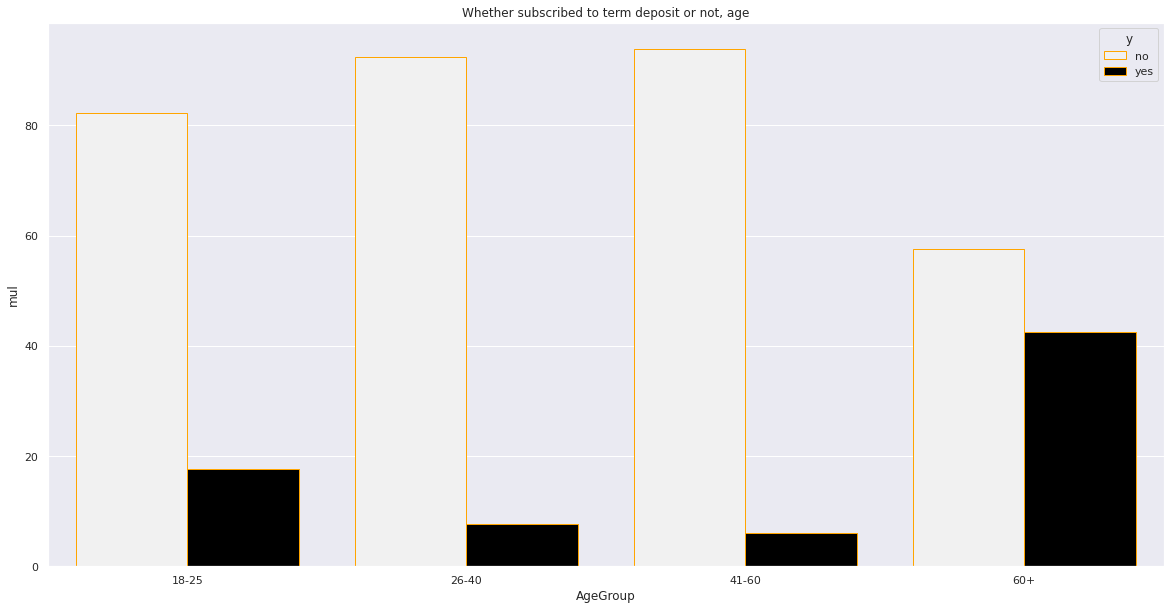

In [ ]:
age_mul=df2.groupby("AgeGroup")["y"].value_counts(normalize=True).mul(100)
age_muldf=pd.DataFrame(age_mul)
age_muldf.rename(columns = {'y':'mul'}, inplace = True)
age_muldf=age_muldf.reset_index()
age_muldf
plt.figure(figsize=(20,10))
plt.title("Whether subscribed to term deposit or not, age")
sns.barplot(data=age_muldf,hue="y",x="AgeGroup",y="mul",color="black",edgecolor='orange')

**However, when we look at the percentages in the age groups, almost half of the 60+ customers said "yes" to subscription of term deposit.**

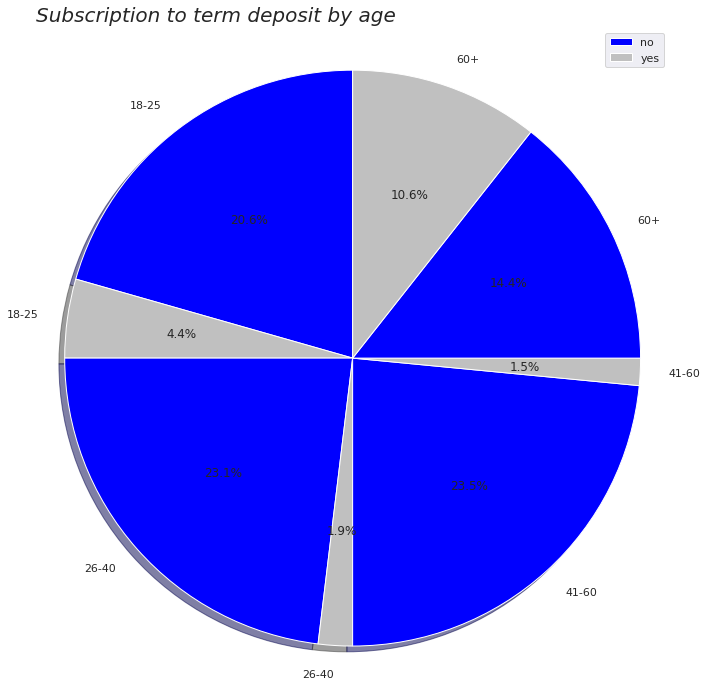

In [ ]:
plt.figure(figsize=(10,10))
plt.title("Subscription to term deposit by age",loc="left",fontstyle='italic',fontsize=20)
plt.pie(age_muldf["mul"],shadow=True,autopct='%1.1f%%',data=age_muldf,labels="AgeGroup",startangle=90,colors=["blue","silver"])
plt.axis('equal')
plt.legend(labels=["no","yes"], loc="best")
plt.tight_layout()
plt.show()

**Watch out that every age group is adds up to %25(since there are 4 age groups in the whole data) and distrbition is according to that**

## Job Column Analysis

In [ ]:
df_job=df2.groupby("job")["age"].count()
df_job=pd.DataFrame(df_job)
df_job = df_job.rename_axis('job').reset_index()
df_job.rename(columns = {'age':'user'}, inplace = True)
df_job.head()

,job,user
0,admin.,8783
1,blue-collar,7826
2,entrepreneur,1233
3,housemaid,868
4,management,2439


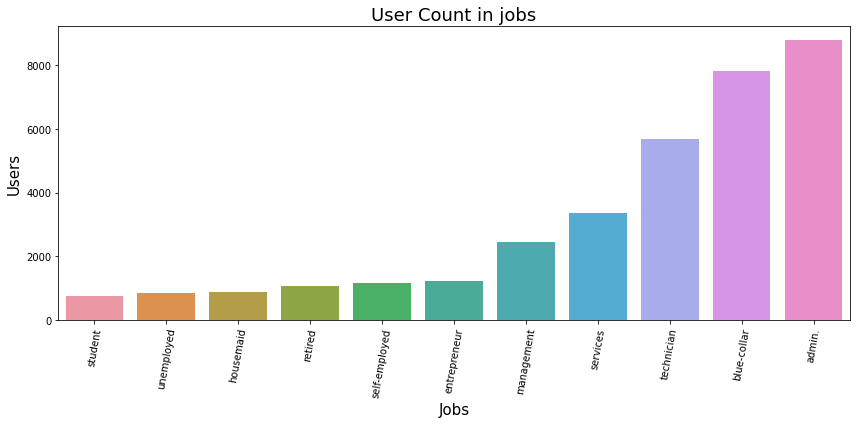

In [ ]:
plt.figure(figsize=(12,6))
# make barplot and sort bars
sns.barplot(x='job',
            y="user", 
            data=df_job, 
            order=df_job.sort_values('user').job)
# set labels
plt.xlabel("Jobs", size=15)
plt.xticks(rotation=80)
plt.ylabel("Users", size=15)
plt.title("User Count in jobs", size=18)
plt.tight_layout()

In [ ]:
job_count=df2.groupby(["y","job"])["job"].agg(["count"])
job_countt=job_count.reset_index()

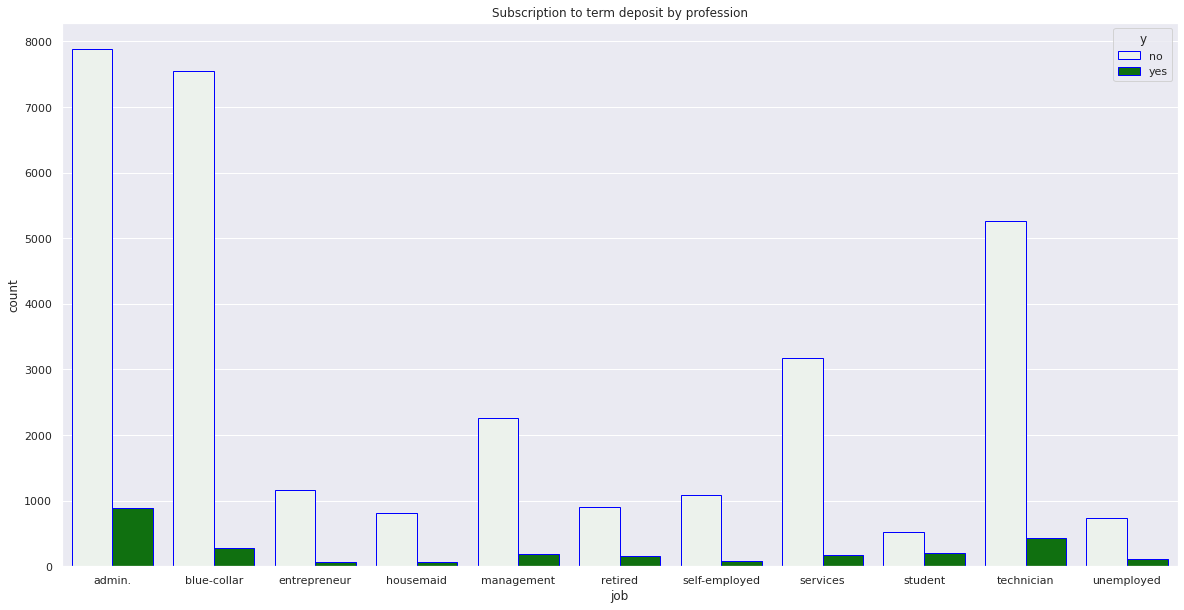

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Subscription to term deposit by profession")
sns.barplot(data=job_countt,hue="y",x="job",y="count",color="green", edgecolor='blue')

In [ ]:
df2.groupby("job")["y"].value_counts(normalize=True).mul(100)
#ratios in terms of percent

job            y  
admin.         no     89.844017
               yes    10.155983
blue-collar    no     96.383849
               yes     3.616151
entrepreneur   no     94.647202
               yes     5.352798
housemaid      no     92.857143
               yes     7.142857
management     no     92.455925
               yes     7.544075
retired        no     84.737828
               yes    15.262172
self-employed  no     92.668372
               yes     7.331628
services       no     95.011947
               yes     4.988053
student        no     71.815718
               yes    28.184282
technician     no     92.407733
               yes     7.592267
unemployed     no     87.455197
               yes    12.544803
Name: y, dtype: float64

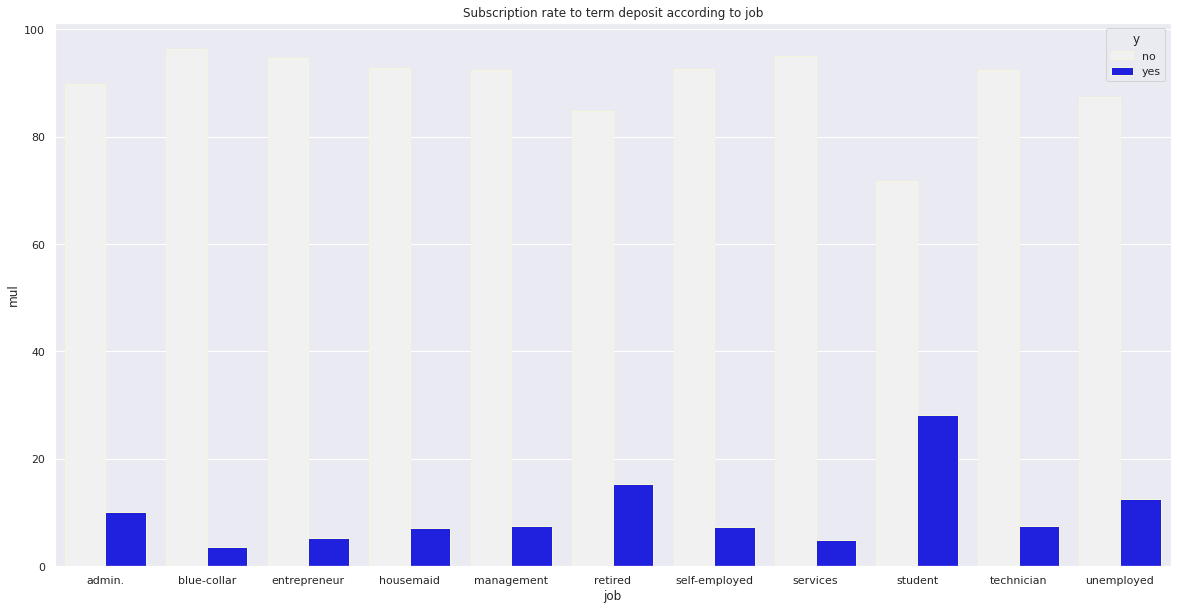

In [ ]:
job_mul=df2.groupby("job")["y"].value_counts(normalize=True).mul(100)
job_muldf=pd.DataFrame(job_mul)
job_muldf.rename(columns = {'y':'mul'}, inplace = True)
job_muldf=job_muldf.reset_index()
plt.figure(figsize=(20,10))
plt.title("Subscription rate to term deposit according to job")
sns.barplot(data=job_muldf,hue="y",x="job",y="mul", color="blue",edgecolor='beige')

**Even though, the top 3 jobs according to numbers in the data admins, blue-collars and technicians, there are higher chance that students and retired people accept the term deposit subscription.**

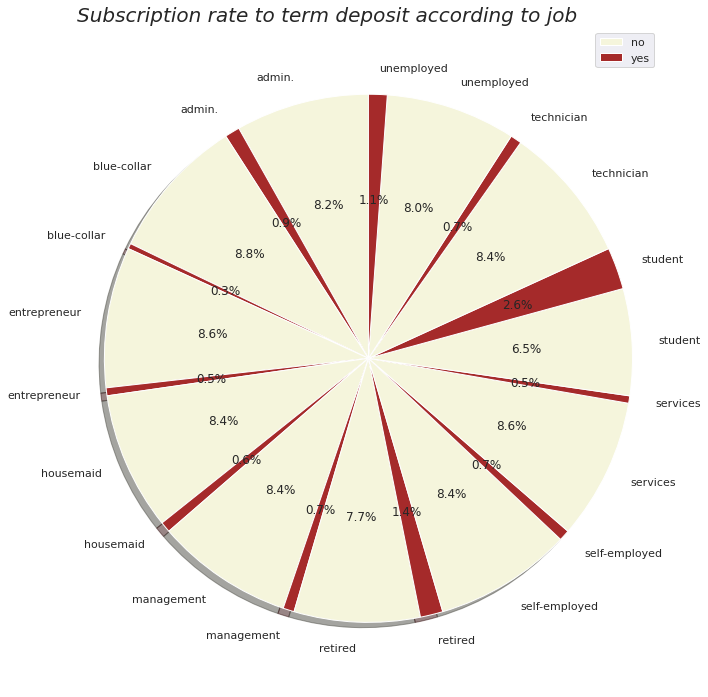

In [ ]:
plt.figure(figsize=(10,10))
plt.title("Subscription rate to term deposit according to job",loc="left",fontstyle='italic',fontsize=20)
plt.pie(job_muldf["mul"],shadow=True,autopct='%1.1f%%',data=job_muldf,labels="job",startangle=90,colors=["beige","brown"])
plt.axis('equal')
plt.legend(labels=["no","yes"], loc="best")
plt.tight_layout()
plt.show()

## Month Column Analysis

In [ ]:
df_month=df2.groupby("month")["age"].count()
df_month=pd.DataFrame(df_month)
df_month = df_month.rename_axis('month').reset_index()
df_month.rename(columns = {'age':'user'}, inplace = True)
df_month.head()

,month,user
0,apr,2244
1,aug,5150
2,dec,134
3,jul,5715
4,jun,4299


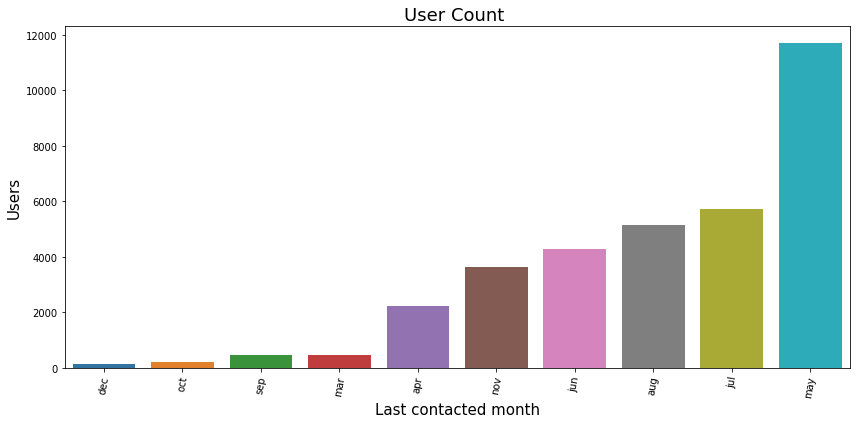

In [ ]:
plt.figure(figsize=(12,6))
# make barplot and sort bars
sns.barplot(x='month',
            y="user", 
            data=df_month, 
            order=df_month.sort_values('user').month)
# set labels
plt.xlabel("Last contacted month", size=15)
plt.xticks(rotation=80)
plt.ylabel("Users", size=15)
plt.title("User Count ", size=18)
plt.tight_layout()

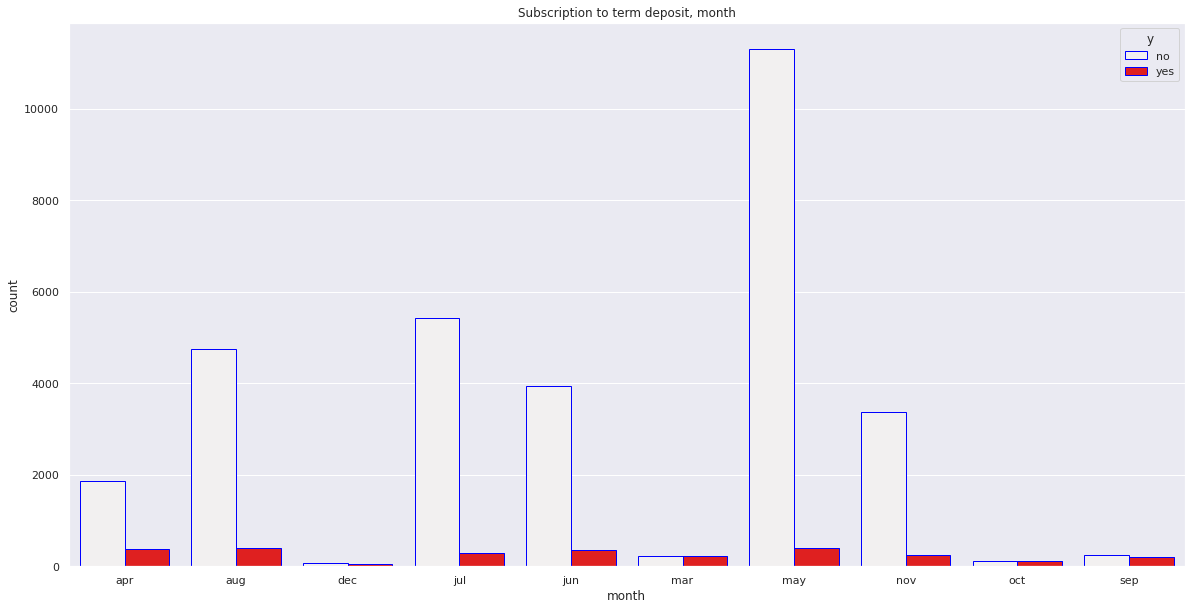

In [ ]:
job_count=df2.groupby(["y","month"])["job"].agg(["count"])
job_countt=job_count.reset_index()
plt.figure(figsize=(20,10))
plt.title("Subscription to term deposit, month")
sns.barplot(data=job_countt,hue="y",x="month",y="count",color="red", edgecolor='blue')

**There are lots of customers who have been called in May.**

In [ ]:
df2.groupby("month")["y"].value_counts(normalize=True).mul(100)
#ratios in terms of percent

month  y  
apr    no     83.377897
       yes    16.622103
aug    no     92.388350
       yes     7.611650
dec    no     54.477612
       yes    45.522388
jul    no     95.083115
       yes     4.916885
jun    no     91.812049
       yes     8.187951
mar    yes    51.327434
       no     48.672566
may    no     96.552901
       yes     3.447099
nov    no     93.125345
       yes     6.874655
oct    no     50.892857
       yes    49.107143
sep    no     56.207675
       yes    43.792325
Name: y, dtype: float64

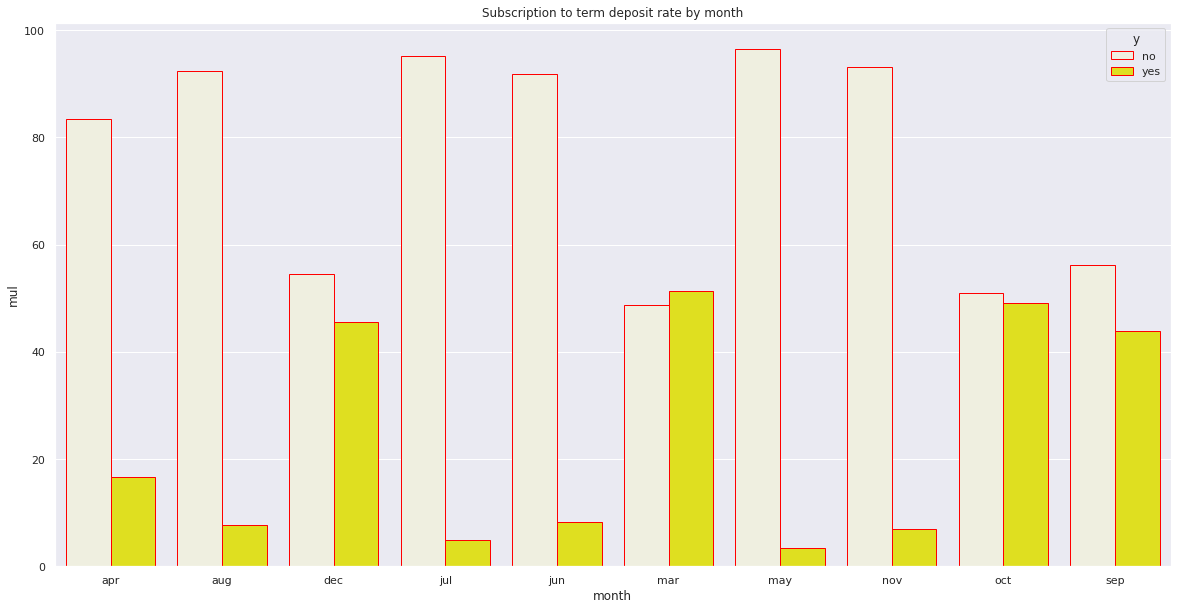

In [ ]:
month_mul=df2.groupby("month")["y"].value_counts(normalize=True).mul(100)
month_muldf=pd.DataFrame(month_mul)
month_muldf.rename(columns = {'y':'mul'}, inplace = True)
month_muldf=month_muldf.reset_index()
month_muldf
plt.figure(figsize=(20,10))
plt.title("Subscription to term deposit rate by month")
sns.barplot(data=month_muldf,hue="y",x="month",y="mul",color="yellow", edgecolor='red')

**Although the months with the least number of customers are December, March, October and September, we see that the customers called in those months accept the campaign with a much higher rate.**

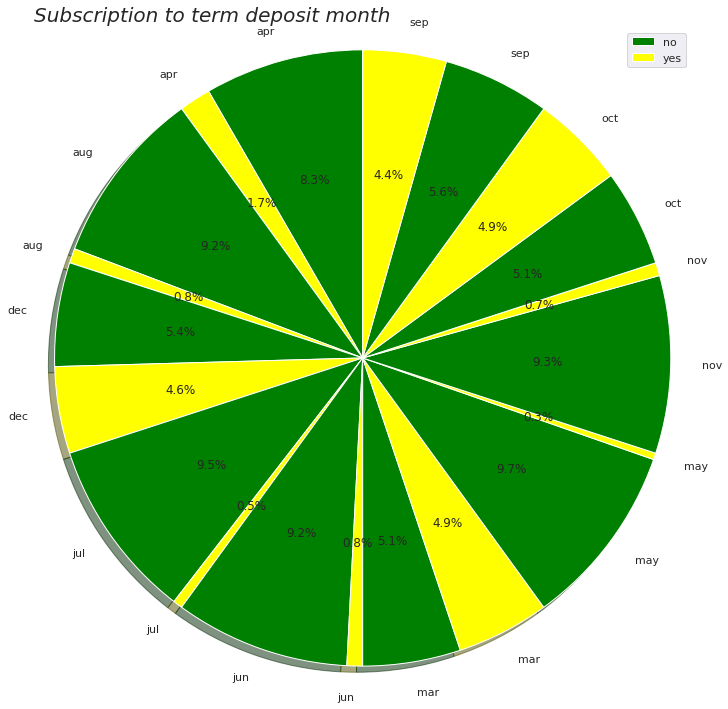

In [ ]:
plt.figure(figsize=(10,10))
plt.title("Subscription to term deposit month",loc="left",fontstyle='italic',fontsize=20)
plt.pie(month_muldf["mul"],shadow=True,autopct='%1.1f%%',data=month_muldf,labels="month",startangle=90,colors=["green","yellow"])
plt.axis('equal')
plt.legend(labels=["no","yes"], loc="best")
plt.tight_layout()
plt.show()

**Watch out that every month is adds up to %10(since there are 10 months in the whole data) and distrbition is according to that**

## Day_of_week Column Analysis

In [ ]:
df_day=df2.groupby("day_of_week")["age"].count()
df_day=pd.DataFrame(df_day)
df_day = df_day.rename_axis('day_of_week').reset_index()
df_day.rename(columns = {'age':'user'}, inplace = True)
df_day.head()

,day_of_week,user
0,fri,6389
1,mon,7198
2,thu,6986
3,tue,6722
4,wed,6708


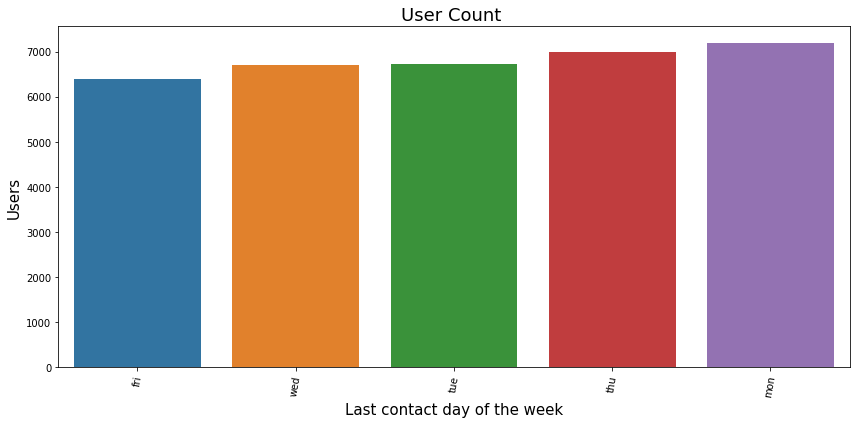

In [ ]:
plt.figure(figsize=(12,6))
# make barplot and sort bars
sns.barplot(x='day_of_week',
            y="user", 
            data=df_day, 
            order=df_day.sort_values('user').day_of_week)
# set labels
plt.xlabel("Last contact day of the week", size=15)
plt.xticks(rotation=80)
plt.ylabel("Users", size=15)
plt.title("User Count ", size=18)
plt.tight_layout()

In [ ]:
df_days=df2.groupby(['y','day_of_week'])["age"].agg(['count'])
df_days

count
y   day_of_week       
no  fri           5934
    mon           6687
    thu           6379
    tue           6176
    wed           6179
yes fri            455
    mon            511
    thu            607
    tue            546
    wed            529

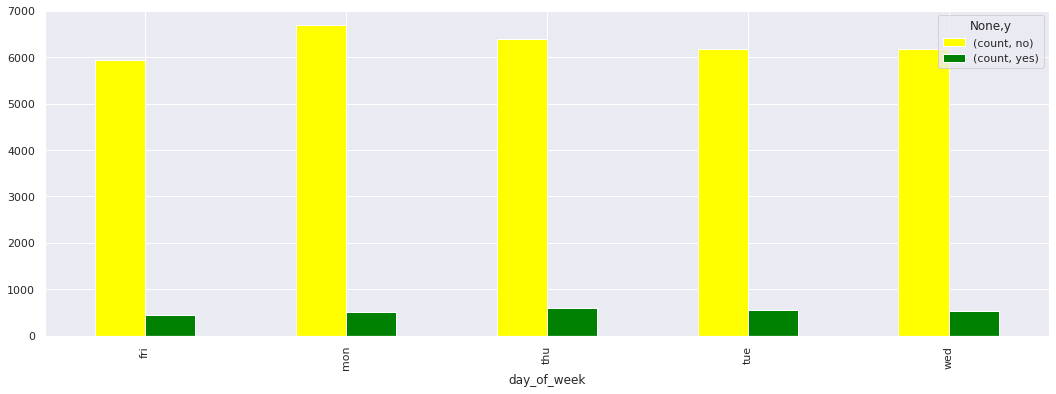

In [ ]:
df_days.unstack('y').plot.bar(figsize=(18,6),color=['yellow', 'green'])

**There is no significant difference in this data, almost everyday is equivalent for making calls and getting a result of "yes" or "no" for the campaign.**

In [ ]:
df2.groupby("day_of_week")["y"].value_counts(normalize=True).mul(100)
#ratios in terms of percent

day_of_week  y  
fri          no     92.878385
             yes     7.121615
mon          no     92.900806
             yes     7.099194
thu          no     91.311194
             yes     8.688806
tue          no     91.877417
             yes     8.122583
wed          no     92.113894
             yes     7.886106
Name: y, dtype: float64

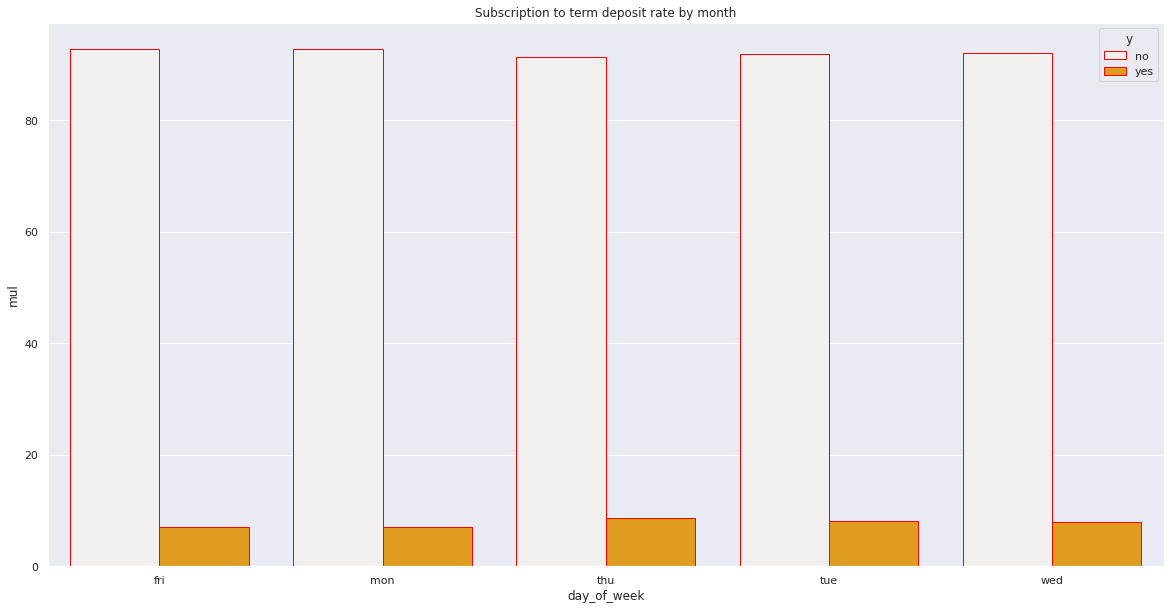

In [ ]:
day_mul=df2.groupby("day_of_week")["y"].value_counts(normalize=True).mul(100)
day_muldf=pd.DataFrame(day_mul)
day_muldf.rename(columns = {'y':'mul'}, inplace = True)
day_muldf=day_muldf.reset_index()
day_muldf
plt.figure(figsize=(20,10))
plt.title("Subscription to term deposit rate by month")
sns.barplot(data=day_muldf,hue="y",x="day_of_week",y="mul",color="orange", edgecolor='red')

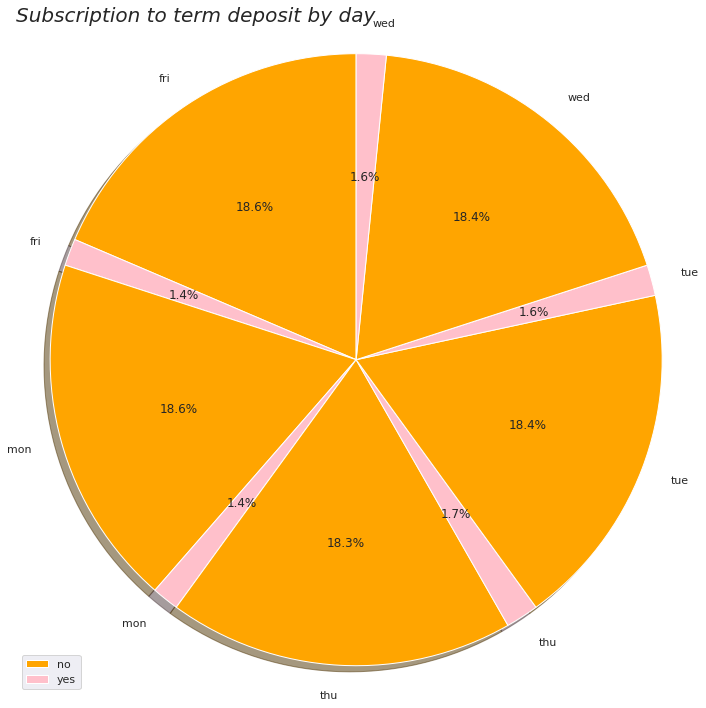

In [ ]:
plt.figure(figsize=(10,10))
plt.title("Subscription to term deposit by day",loc="left",fontstyle='italic',fontsize=20)
plt.pie(day_muldf["mul"],shadow=True,autopct='%1.1f%%',data=day_muldf,labels="day_of_week",startangle=90,colors=["orange","pink"])
plt.axis('equal')
plt.legend(labels=["no","yes"], loc="best")
plt.tight_layout()
plt.show()

**Watch out that every day is adds up to %20(since there are 5 days in the whole data) and distribution is according to that**

## Marital Column Analysis

In [ ]:
df_marital=df2.groupby("marital")["age"].count()
df_marital=pd.DataFrame(df_marital)
df_marital = df_marital.rename_axis('marital').reset_index()
df_marital.rename(columns = {'age':'user'}, inplace = True)
df_marital.head()

,marital,user
0,divorced,3768
1,married,20573
2,single,9662


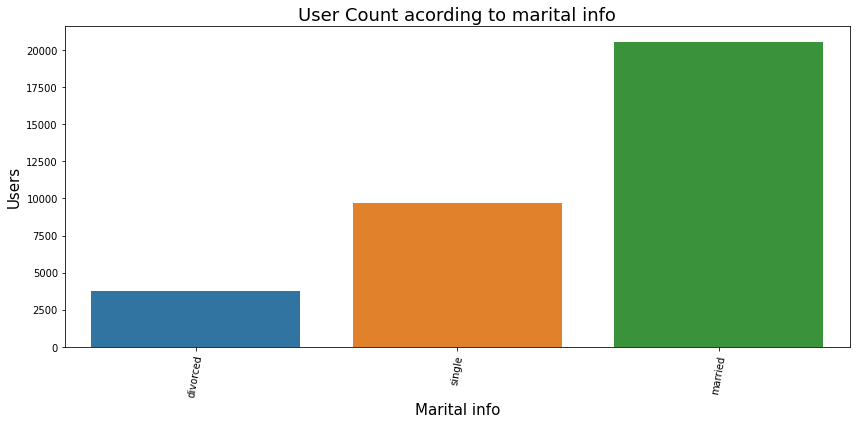

In [ ]:
plt.figure(figsize=(12,6))
# make barplot and sort bars
sns.barplot(x='marital',
            y="user", 
            data=df_marital, 
            order=df_marital.sort_values('user').marital)
# set labels
plt.xlabel("Marital info", size=15)
plt.xticks(rotation=80)
plt.ylabel("Users", size=15)
plt.title("User Count acording to marital info", size=18)
plt.tight_layout()

In [ ]:
df_ratio=df2.groupby("AgeGroup")["marital"].value_counts(normalize=True).mul(100)
df_ratio
#ratios in terms of percent

AgeGroup  marital 
18-25     single      81.424376
          married     17.107195
          divorced     1.468429
26-40     married     53.745560
          single      38.483479
          divorced     7.770961
41-60     married     73.333333
          divorced    16.542670
          single      10.123997
60+       married     86.416185
          divorced    10.404624
          single       3.179191
Name: marital, dtype: float64

In [ ]:
df_ratio=pd.DataFrame(df_ratio)
df_ratio.rename(columns = {'marital':'ratio'}, inplace = True)

df_ratio=df_ratio.reset_index()
df_ratio

,AgeGroup,marital,ratio
0,18-25,single,81.424376
1,18-25,married,17.107195
2,18-25,divorced,1.468429
3,26-40,married,53.745560
4,26-40,single,38.483479
5,26-40,divorced,7.770961
6,41-60,married,73.333333
7,41-60,divorced,16.542670
8,41-60,single,10.123997
9,60+,married,86.416185


In [ ]:
df_marital_age=df2.groupby(['marital','AgeGroup'])["age"].agg(['count'])
df_marital_age

count
marital  AgeGroup       
divorced 18-25        20
         26-40      1444
         41-60      2268
         60+          36
married  18-25       233
         26-40      9987
         41-60     10054
         60+         299
single   18-25      1109
         26-40      7151
         41-60      1388
         60+          11

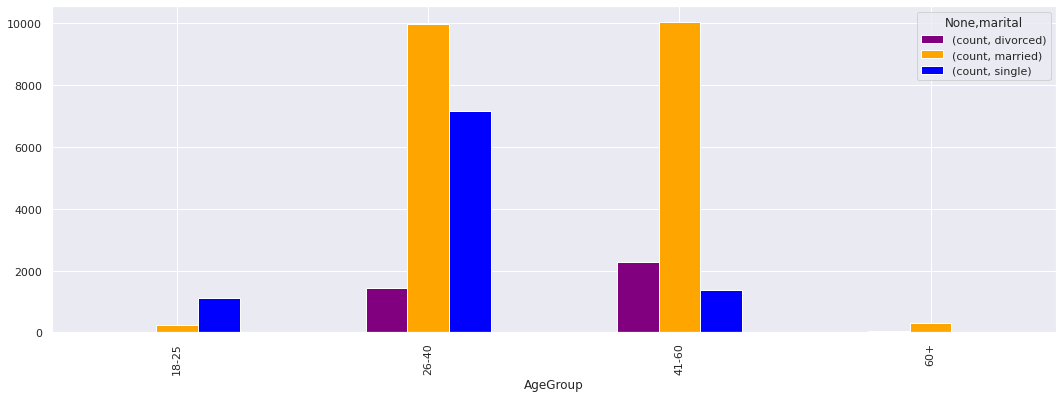

In [ ]:
df_marital_age.unstack('marital').plot.bar(figsize=(18,6),color=['purple', 'orange','blue'])

**Most of the young ones are single while most of the older ones are married.**

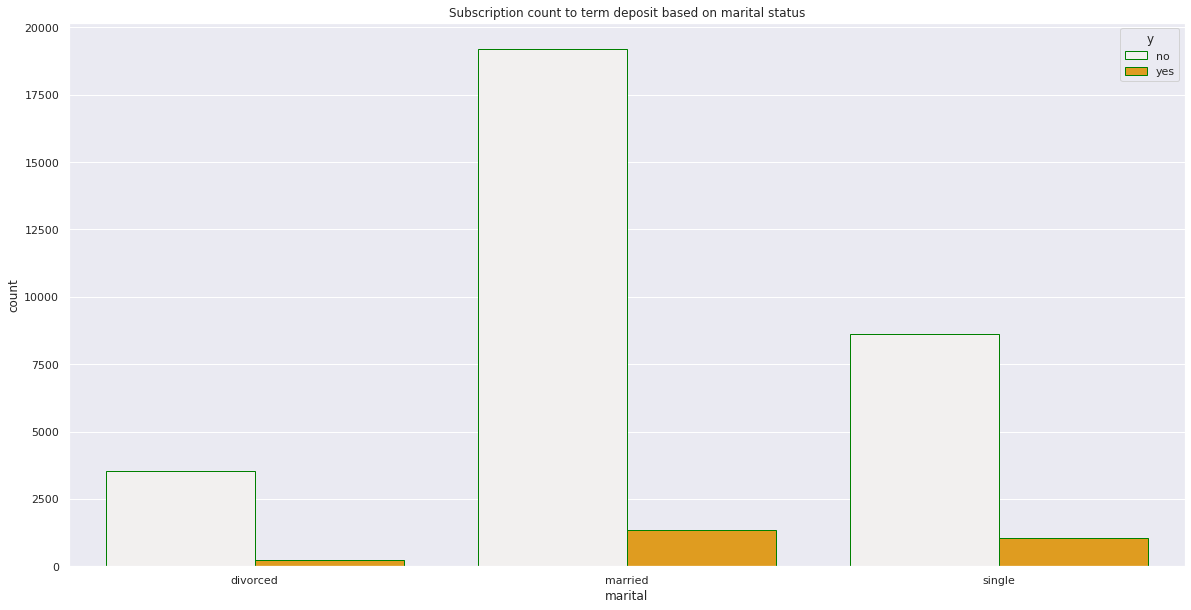

In [ ]:
job_count=df2.groupby(["y","marital"])["job"].agg(["count"])
job_countt=job_count.reset_index()
plt.figure(figsize=(20,10))
plt.title("Subscription count to term deposit based on marital status")
sns.barplot(data=job_countt,hue="y",x="marital",y="count",color="orange", edgecolor='green')

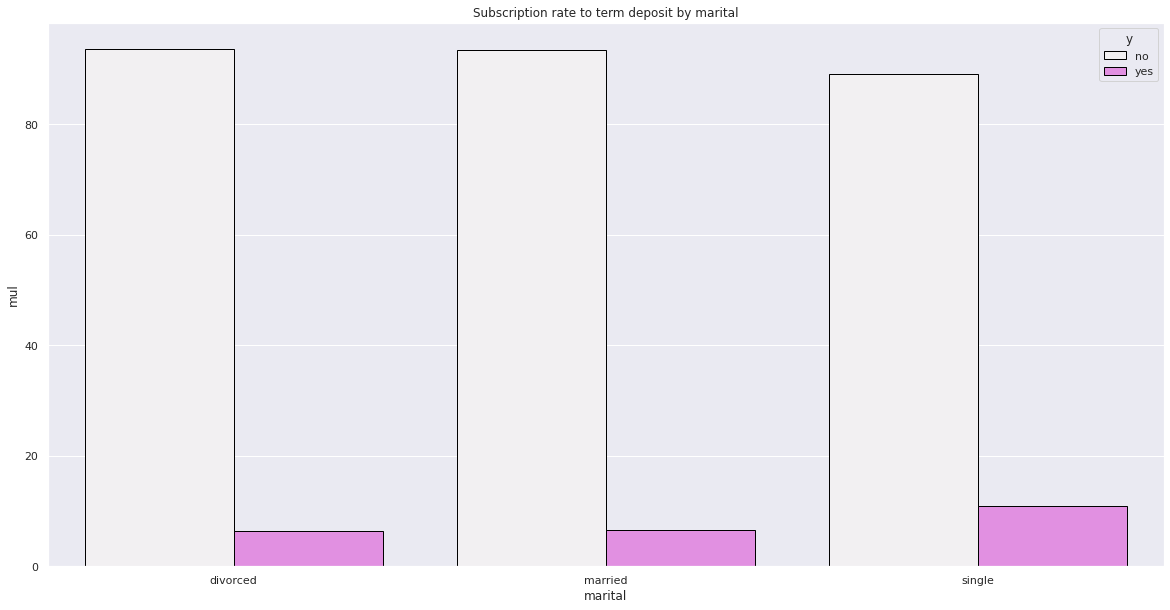

In [ ]:
marital_mul=df2.groupby("marital")["y"].value_counts(normalize=True).mul(100)
marital_muldf=pd.DataFrame(marital_mul)
marital_muldf.rename(columns = {'y':'mul'}, inplace = True)
marital_muldf=marital_muldf.reset_index()
plt.figure(figsize=(20,10))
plt.title("Subscription rate to term deposit by marital")
sns.barplot(data=marital_muldf,hue="y",x="marital",y="mul",color="violet", edgecolor='black')

**There is not much significance on percentages according to maritl status but single ones have the highest population and also the highest rate for accepting the subscription.**

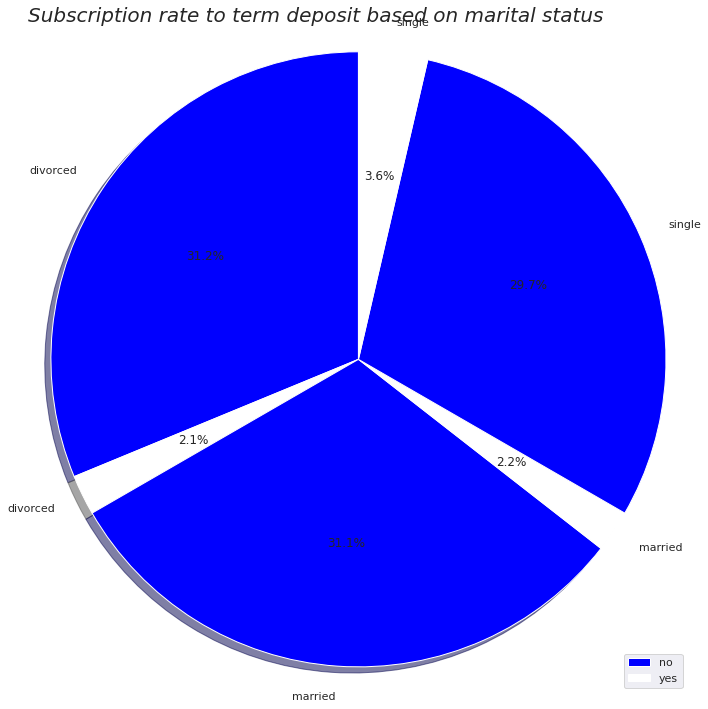

In [ ]:
plt.figure(figsize=(10,10))
plt.title("Subscription rate to term deposit based on marital status",loc="left",fontstyle='italic',fontsize=20)
plt.pie(marital_muldf["mul"],shadow=True,autopct='%1.1f%%',data=marital_muldf,labels="marital",startangle=90,colors=["blue","white"])
plt.axis('equal')
plt.legend(labels=["no","yes"], loc="best")
plt.tight_layout()
plt.show()

**Watch out that every marital status is adds up to %33.3(since there are 3 marital status in the whole data) and distribution is according to that**

## Education Column Analysis

In [ ]:
df_ed=df2.groupby("education")["age"].count()
df_ed=pd.DataFrame(df_ed)
df_ed = df_ed.rename_axis('education').reset_index()
df_ed.rename(columns = {'age':'user'}, inplace = True)
df_ed.head()

,education,user
0,basic.4y,3240
1,basic.6y,1891
2,basic.9y,5096
3,high.school,7965
4,illiterate,14


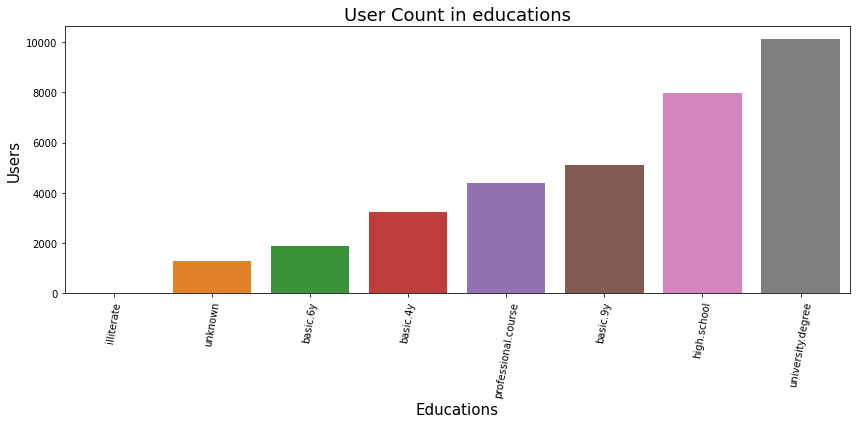

In [ ]:
plt.figure(figsize=(12,6))
# make barplot and sort bars
sns.barplot(x='education',
            y="user", 
            data=df_ed, 
            order=df_ed.sort_values('user').education)
# set labels
plt.xlabel("Educations", size=15)
plt.xticks(rotation=80)
plt.ylabel("Users", size=15)
plt.title("User Count in educations", size=18)
plt.tight_layout()

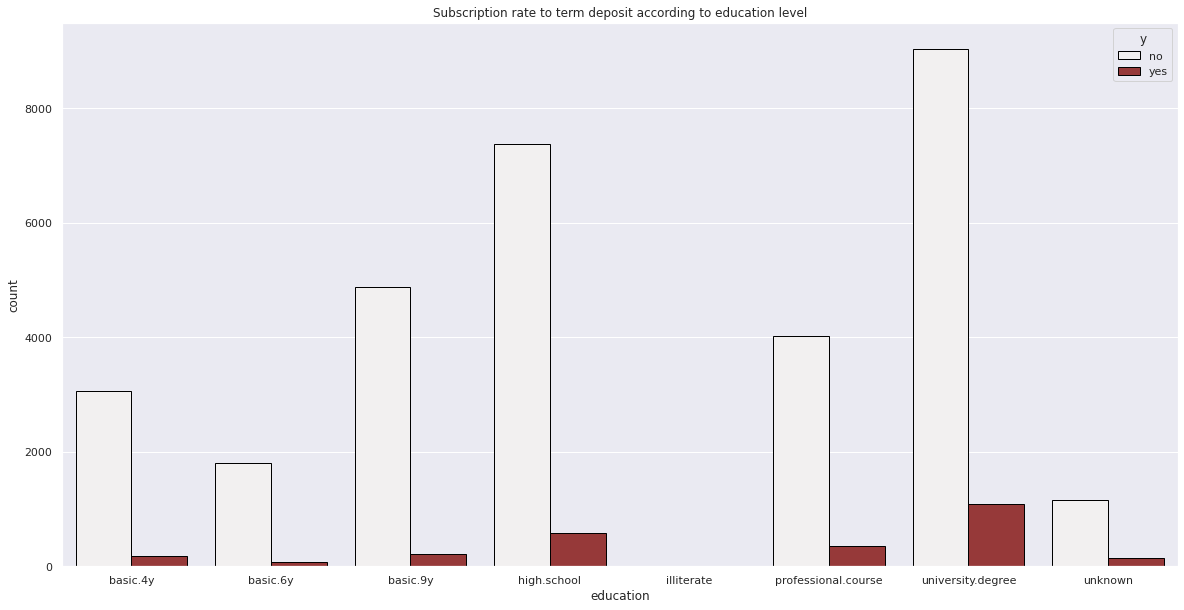

In [ ]:
job_count=df2.groupby(["y","education"])["job"].agg(["count"])
job_countt=job_count.reset_index()
plt.figure(figsize=(20,10))
plt.title("Subscription rate to term deposit according to education level")
sns.barplot(data=job_countt,hue="y",x="education",y="count",color="brown", edgecolor='black')

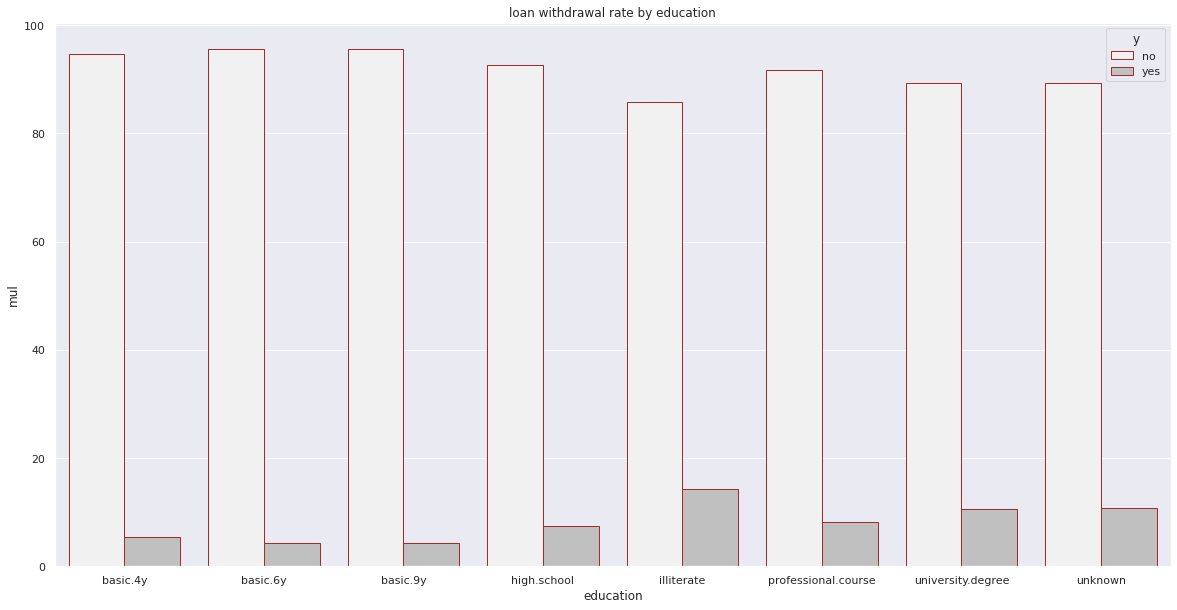

In [ ]:
education_mul=df2.groupby("education")["y"].value_counts(normalize=True).mul(100)
education_muldf=pd.DataFrame(education_mul)
education_muldf.rename(columns = {'y':'mul'}, inplace = True)
education_muldf=education_muldf.reset_index()
plt.figure(figsize=(20,10))
plt.title("loan withdrawal rate by education")
sns.barplot(data=education_muldf,hue="y",x="education",y="mul",color="silver", edgecolor='brown')

**There is so little knowledge and data about illiterate people, but increasing the amount of calls to those people can be beneficial**

**Watch out that every job is adds up to %9.1-9.2(since there are 11 jobs  in the whole data) and distribution is according to that**

#**Getting rid of(Imputation) from outliers with IQR method**

In [ ]:
def IQR_imputation(df, column):

     Q1 = df[column].quantile(0.25)
     Q3 = df[column].quantile(0.75)
     IQR = Q3 - Q1
     df.loc[((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))), column] = np.mean(df[column])
     return df

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


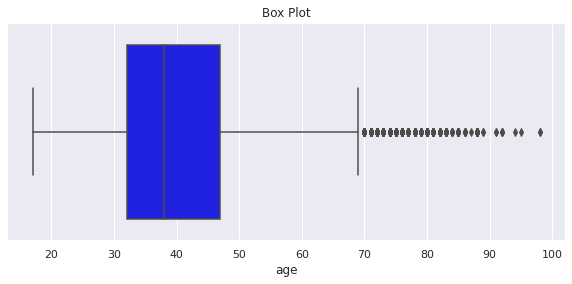

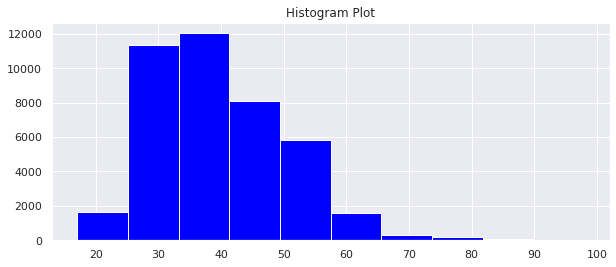

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


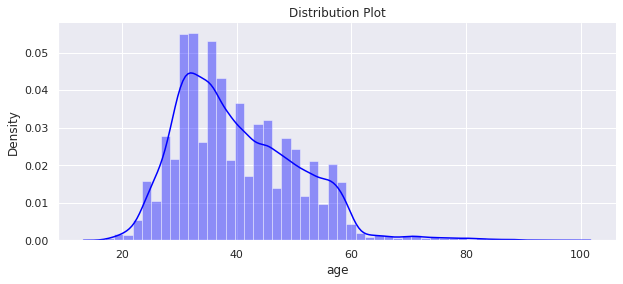

In [ ]:
Box_plots(df3["age"],"blue")
hist_plots(df3["age"],"blue")
dist_plots(df3["age"],"blue")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


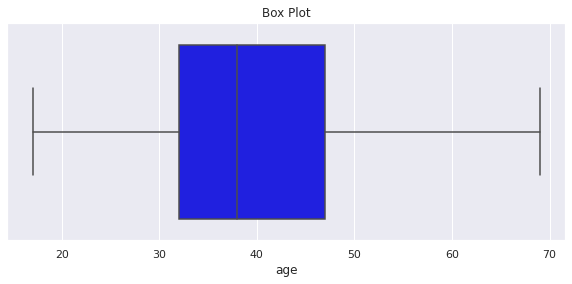

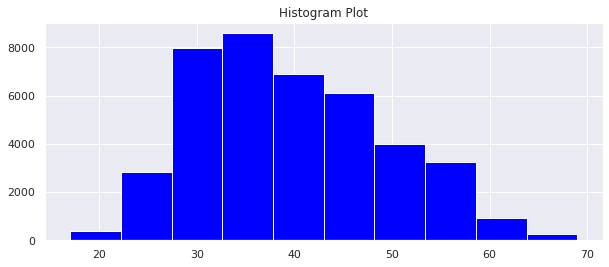

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


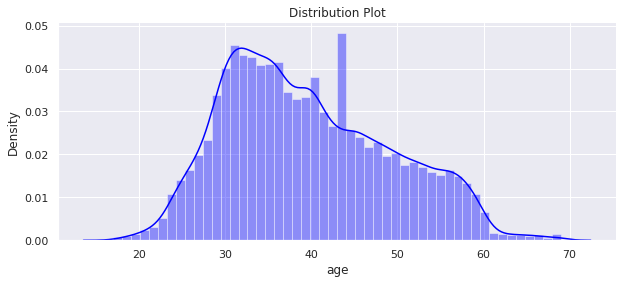

In [ ]:
df3 = df3.pipe(IQR_imputation, 'age')
Box_plots(df3["age"],"blue")
hist_plots(df3["age"],"blue")
dist_plots(df3["age"],"blue")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


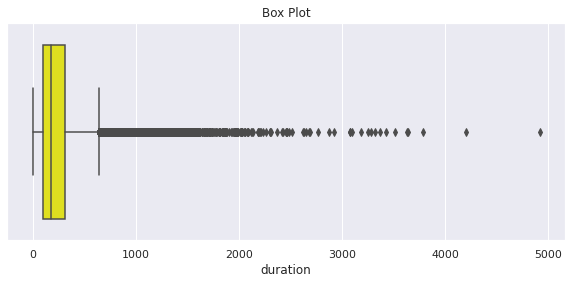

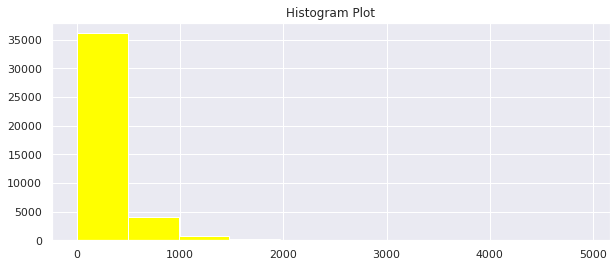

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


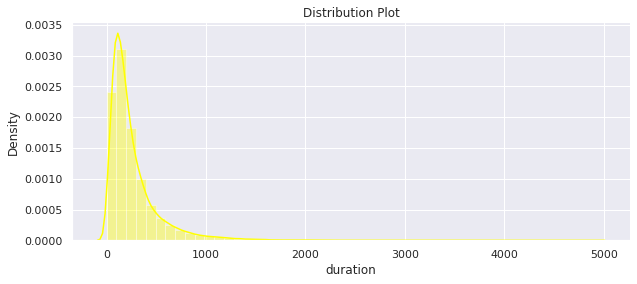

In [ ]:
Box_plots(df3["duration"],"yellow")
hist_plots(df3["duration"],"yellow")
dist_plots(df3["duration"],"yellow")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


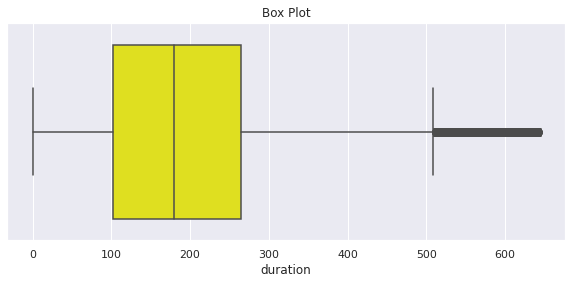

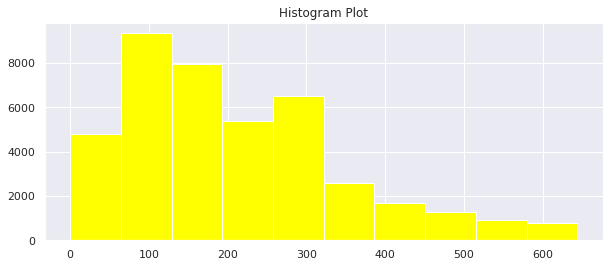

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


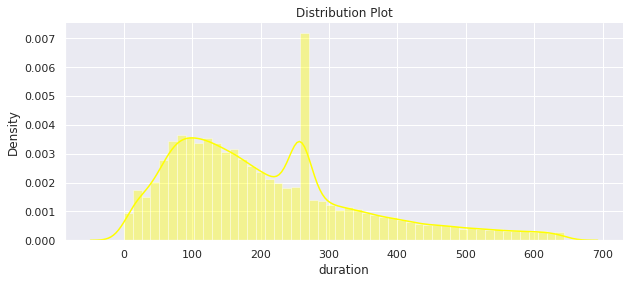

In [ ]:
df3 = df3.pipe(IQR_imputation, 'duration')
Box_plots(df3["duration"],"yellow")
hist_plots(df3["duration"],"yellow")
dist_plots(df3["duration"],"yellow")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


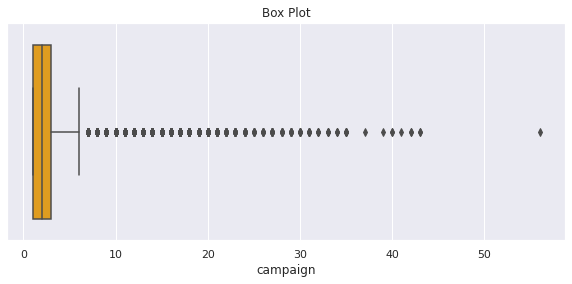

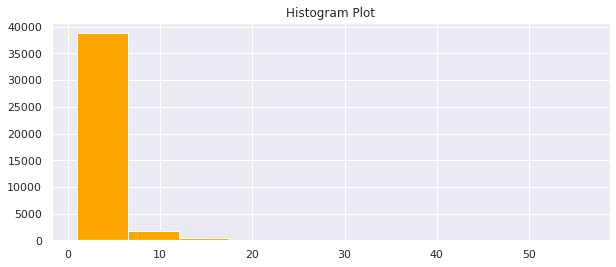

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


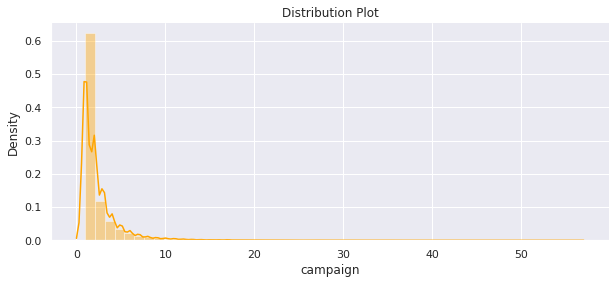

In [ ]:
Box_plots(df3["campaign"],"orange")
hist_plots(df3["campaign"],"orange")
dist_plots(df3["campaign"],"orange")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


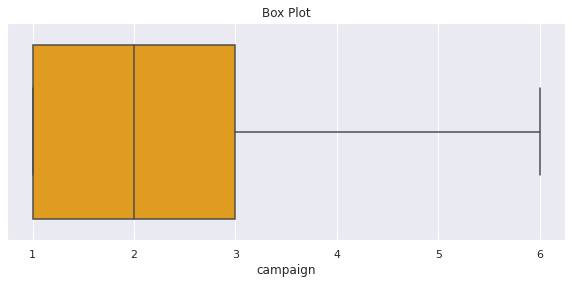

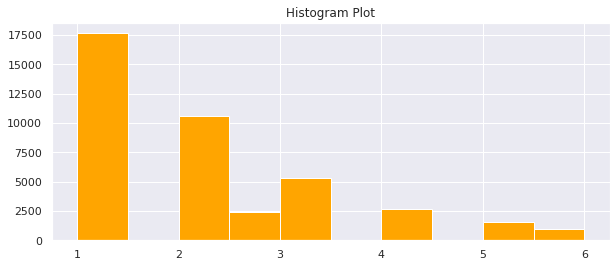

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


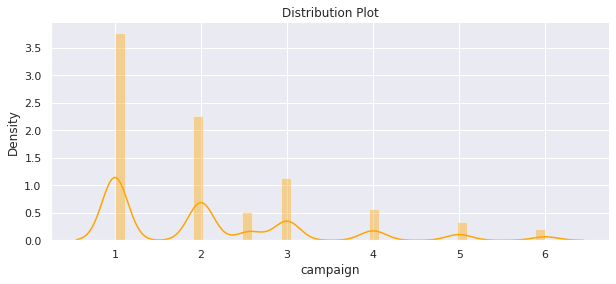

In [ ]:
df3 = df3.pipe(IQR_imputation, 'campaign')
Box_plots(df3["campaign"],"orange")
hist_plots(df3["campaign"],"orange")
dist_plots(df3["campaign"],"orange")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


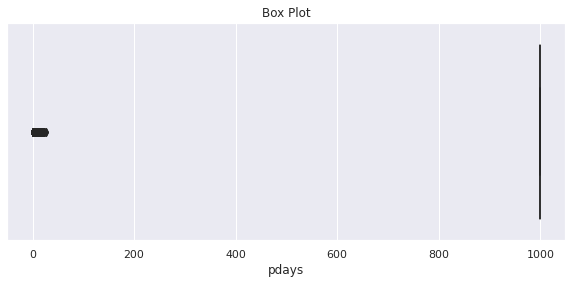

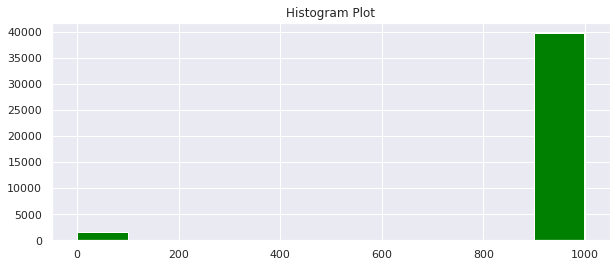

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


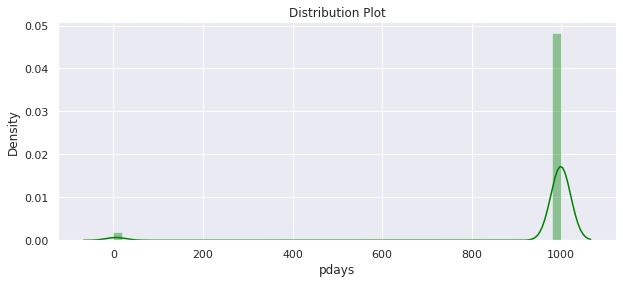

In [ ]:
Box_plots(df3["pdays"],"green")
hist_plots(df3["pdays"],"green")
dist_plots(df3["pdays"],"green")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


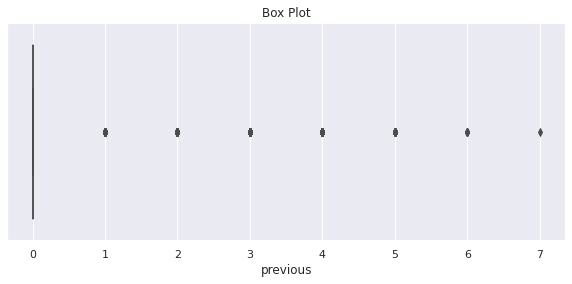

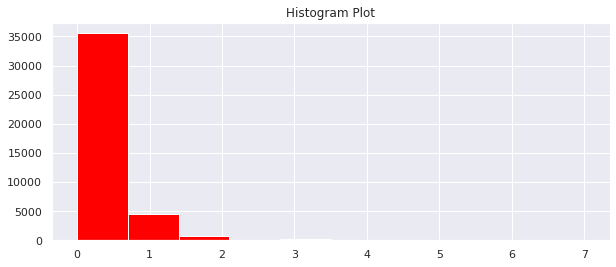

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


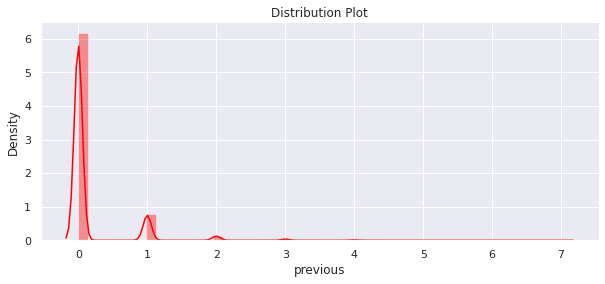

In [ ]:
Box_plots(df3["previous"],"red")
hist_plots(df3["previous"],"red")
dist_plots(df3["previous"],"red")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


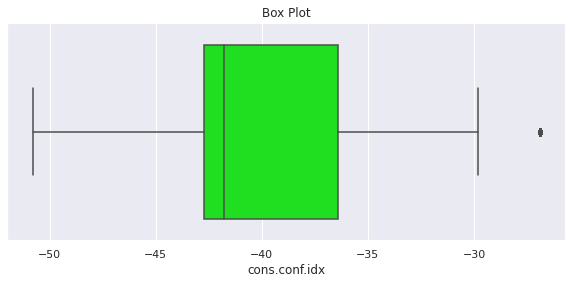

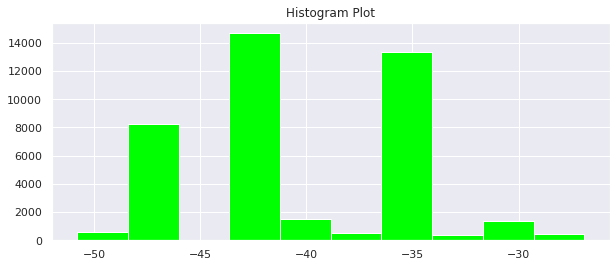

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


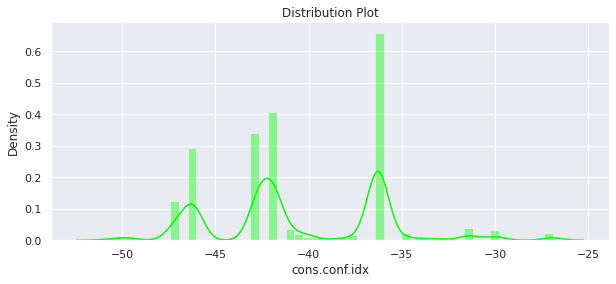

In [ ]:
Box_plots(df3["cons.conf.idx"],"lime")
hist_plots(df3["cons.conf.idx"],"lime")
dist_plots(df3["cons.conf.idx"],"lime")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


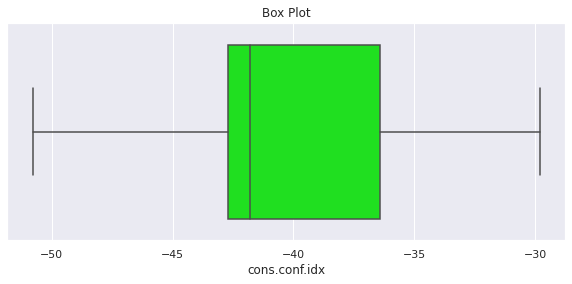

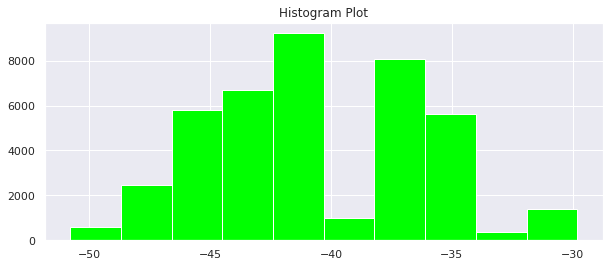

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


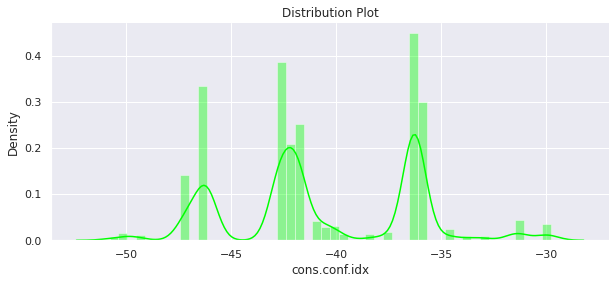

In [ ]:
df3 = df3.pipe(IQR_imputation, 'cons.conf.idx')
Box_plots(df3["cons.conf.idx"],"lime")
hist_plots(df3["cons.conf.idx"],"lime")
dist_plots(df3["cons.conf.idx"],"lime")

**It was seen that for remaining columns "cons.price.idx","emp.var.rate","euribor3m" and "nr.employed", there is no need for outlier processing with IQR method.**

## Process of Na, "unkown" values after outlier imputation

In [ ]:
str_cols = [x for x in df3.columns if type(df3[x].loc[df3[x].first_valid_index()])==str]

for columns in str_cols:
  print(columns)
  print(len(df3[df3[columns].str.contains('unknown')]))

job
330
marital
80
education
1731
default
8597
housing
990
loan
990
contact
0
month
0
day_of_week
0
poutcome
0
y
0


**When object typed columns are checked, the “unknown” string is searched, the number of NA, “unknown” rows from 41188 rows in total in each column are stated with their column names above.**

In [ ]:
df3['job'] = df3['job'].replace(['unknown'],np.nan)
df3['marital'] = df3['marital'].replace(['unknown'],np.nan)
df3['default'] = df3['default'].replace(['unknown'],"no")
df3['housing'] = df3['housing'].replace(['unknown'],np.nan)
df3['loan'] = df3['loan'].replace(['unknown'],"no")
df3=df3.dropna()

df3.shape

(39803, 21)